# 0.0 Imports

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 0.1 Load Data

In [113]:
df_raw = pd.read_csv('../data/raw/df_ready.csv')

In [114]:
df_raw = df_raw.drop(columns={  'Unnamed: 0', 'Date_imp', 'Cluster', 'condition', 'sourceURLs', 'Date_imp_d.1', 
                                'Zscore_1', 'price_std', 'imageURLs', 'shipping', 'weight', 'currency'})

In [115]:
df_raw.head()

,Date_imp_d,Category_name,name,price,disc_price,merchant,Disc_percentage,isSale,Imp_count,brand,p_description,dateAdded,dateSeen,dateUpdated,manufacturer,Day_n,month,month_n,day,Week_Number
0,2017/12/14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,64.99,Walmart.com,0.06,Yes,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-12-14T06:00:00Z,2018-06-13T19:39:02Z,Boytone,Thursday,12,December,14,50
1,2017/09/08,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,69.00,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-09-08T05:00:00Z,2018-06-13T19:39:02Z,Boytone,Friday,9,September,8,36
2,2017/10/24,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,66.00,66.00,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-10-24T04:00:00Z,2018-06-13T19:39:02Z,Boytone,Tuesday,10,October,24,43
3,2017/08/15,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,74.99,74.99,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-08-15T15:00:00Z,2018-06-13T19:39:02Z,Boytone,Tuesday,8,August,15,33
4,2017/09/14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.99,69.99,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-09-14T21:00:00Z,2018-06-13T19:39:02Z,Boytone,Thursday,9,September,14,37


# 1.0 Descrição dos dados

In [116]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [117]:
cols_name = ['date_imp', 'category_name', 'name', 'price', 'disc_price',
       'merchant', 'disc_percentage', 'is_sale', 'imp_count', 'brand',
       'p_description', 'dateadded', 'dateseen', 'dateupdated', 'manufacturer',
       'day_n', 'month', 'month_n', 'day', 'week_number']
df1.columns = cols_name

## 1.2 Data Dimension

In [118]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of cols: {df1.shape[1]}')

Number of rows: 23151
Number of cols: 20


## 1.3 Data types

In [119]:
df1.dtypes

date_imp            object
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
dateadded           object
dateseen            object
dateupdated         object
manufacturer        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
dtype: object

## 1.4 Check NA

In [120]:
df1.isna().sum()

date_imp               0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
dateadded              0
dateseen               0
dateupdated            0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

## 1.5 Change Types

In [121]:
df1['date_imp'] = pd.to_datetime( df1['date_imp'])

## 1.7 Descriptive Statistics

In [122]:
num_attributes = df1.select_dtypes( include=['float64', 'int64'])
cat_attributes = df1.select_dtypes( exclude=['float64', 'int64', 'datetime64[ns]'])

## 1.7.1 Numerical attributes

In [123]:
# central tendency
ct1 = pd.DataFrame(num_attributes.apply(np.mean) ).T   # média
ct2 = pd.DataFrame(num_attributes.apply(np.median) ).T  # mediana

# dispersion
d1 = pd.DataFrame(num_attributes.apply(np.std) ).T # Desvio padrão
d2 = pd.DataFrame(num_attributes.apply(min) ).T # valor mínimo
d3 = pd.DataFrame(num_attributes.apply(max) ).T # valor máximo
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min())).T # Variação entre o mínimo e máxilo valor
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew())).T #skewness
d6 = pd.DataFrame(num_attributes.apply( lambda x : x.kurtosis())).T # kurtosis

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']
m

,att,min,max,range,mean,median,std,skew,kurt
0,price,1.0,10879.95,10878.95,513.037803,199.99,859.091448,4.595160,34.411146
1,disc_price,1.0,10879.95,10878.95,494.104295,199.00,808.571509,4.748349,39.612839
2,disc_percentage,0.0,0.80,0.80,0.016933,0.00,0.077847,5.217632,28.754920
3,imp_count,1.0,31.00,30.00,6.560926,5.00,5.403049,1.286351,1.639569
4,month,1.0,12.00,11.00,7.651030,8.00,2.592787,-0.099417,-0.628859
5,day,1.0,31.00,30.00,15.693879,16.00,9.681413,0.032258,-1.331838
6,week_number,1.0,51.00,50.00,31.342750,32.00,11.316253,-0.266980,-0.648027


# 2.0 - EDA

In [124]:
df2 = df1.copy()

In [125]:
df2.head()

,date_imp,category_name,name,price,disc_price,merchant,disc_percentage,is_sale,imp_count,brand,p_description,dateadded,dateseen,dateupdated,manufacturer,day_n,month,month_n,day,week_number
0,2017-12-14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,64.99,Walmart.com,0.06,Yes,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-12-14T06:00:00Z,2018-06-13T19:39:02Z,Boytone,Thursday,12,December,14,50
1,2017-09-08,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,69.00,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-09-08T05:00:00Z,2018-06-13T19:39:02Z,Boytone,Friday,9,September,8,36
2,2017-10-24,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,66.00,66.00,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-10-24T04:00:00Z,2018-06-13T19:39:02Z,Boytone,Tuesday,10,October,24,43
3,2017-08-15,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,74.99,74.99,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-08-15T15:00:00Z,2018-06-13T19:39:02Z,Boytone,Tuesday,8,August,15,33
4,2017-09-14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.99,69.99,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-09-14T21:00:00Z,2018-06-13T19:39:02Z,Boytone,Thursday,9,September,14,37


In [126]:
df2.columns

Index(['date_imp', 'category_name', 'name', 'price', 'disc_price', 'merchant',
       'disc_percentage', 'is_sale', 'imp_count', 'brand', 'p_description',
       'dateadded', 'dateseen', 'dateupdated', 'manufacturer', 'day_n',
       'month', 'month_n', 'day', 'week_number'],
      dtype='object')

Qual o merchant que mais vendeu?

Qual a categoria mais vendida?

Qual a marca mais vendida?

Quais os dias que mais vendem?

Quais os meses que mais vendem

Quais as semanas que mais vendem

## 2.1 Qual o merchant que mais vendeu?

<AxesSubplot:xlabel='merchant', ylabel='date_imp'>

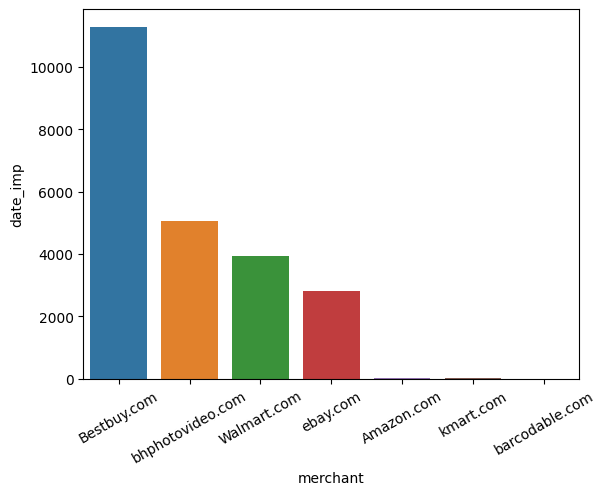

In [127]:
aux1 = df2[['date_imp', 'merchant']].groupby('merchant').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=30)
sns.barplot(x='merchant', y='date_imp', data=aux1)

In [128]:
#seleção de lojas
df_best     = df2[df2['merchant'] == 'Bestbuy.com']
df_bhp      = df2[df2['merchant'] == 'bhphotovideo.com']
df_walmart  = df2[df2['merchant'] == 'Walmart.com']
df_ebay     = df2[df2['merchant'] == 'ebay.com']

## 2.2 Qual a categoria mais vendida?

### 2.2.1 Categorias mais vendidas no geral

<AxesSubplot:xlabel='category_name', ylabel='date_imp'>

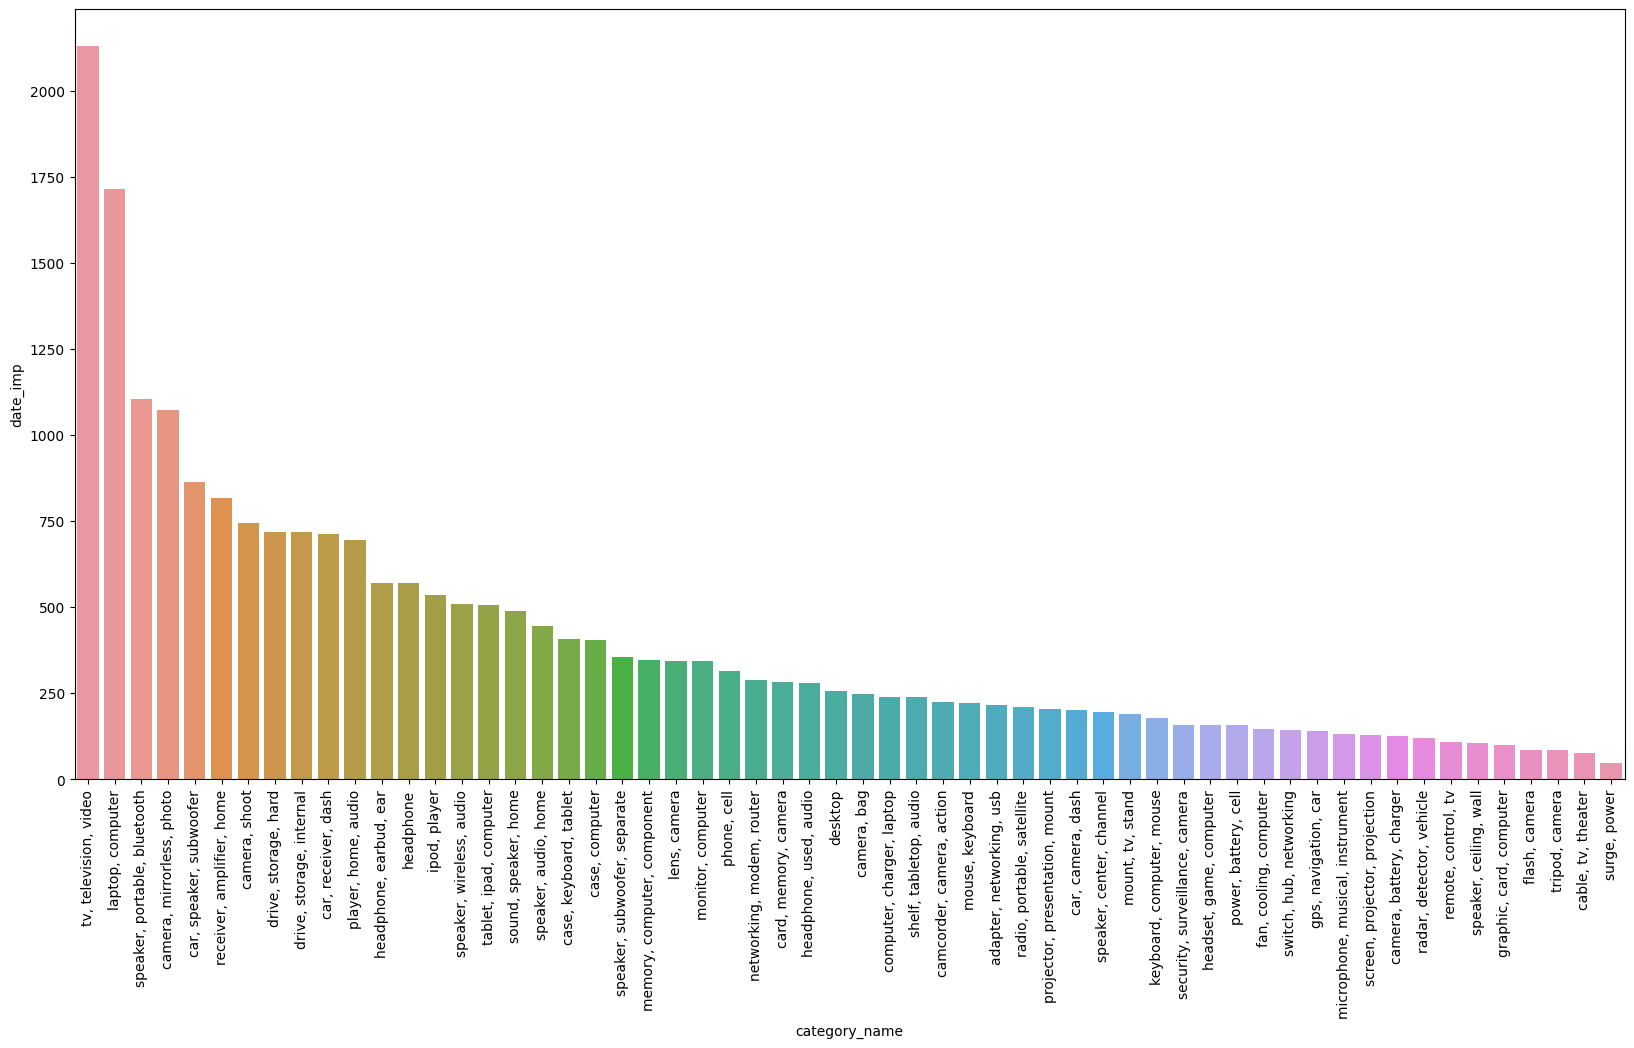

In [129]:
plt.figure(figsize=(20,10))
aux2 = df2[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='category_name', y='date_imp', data=aux2)

### 2.2.1 Categorias mais vendidas por loja

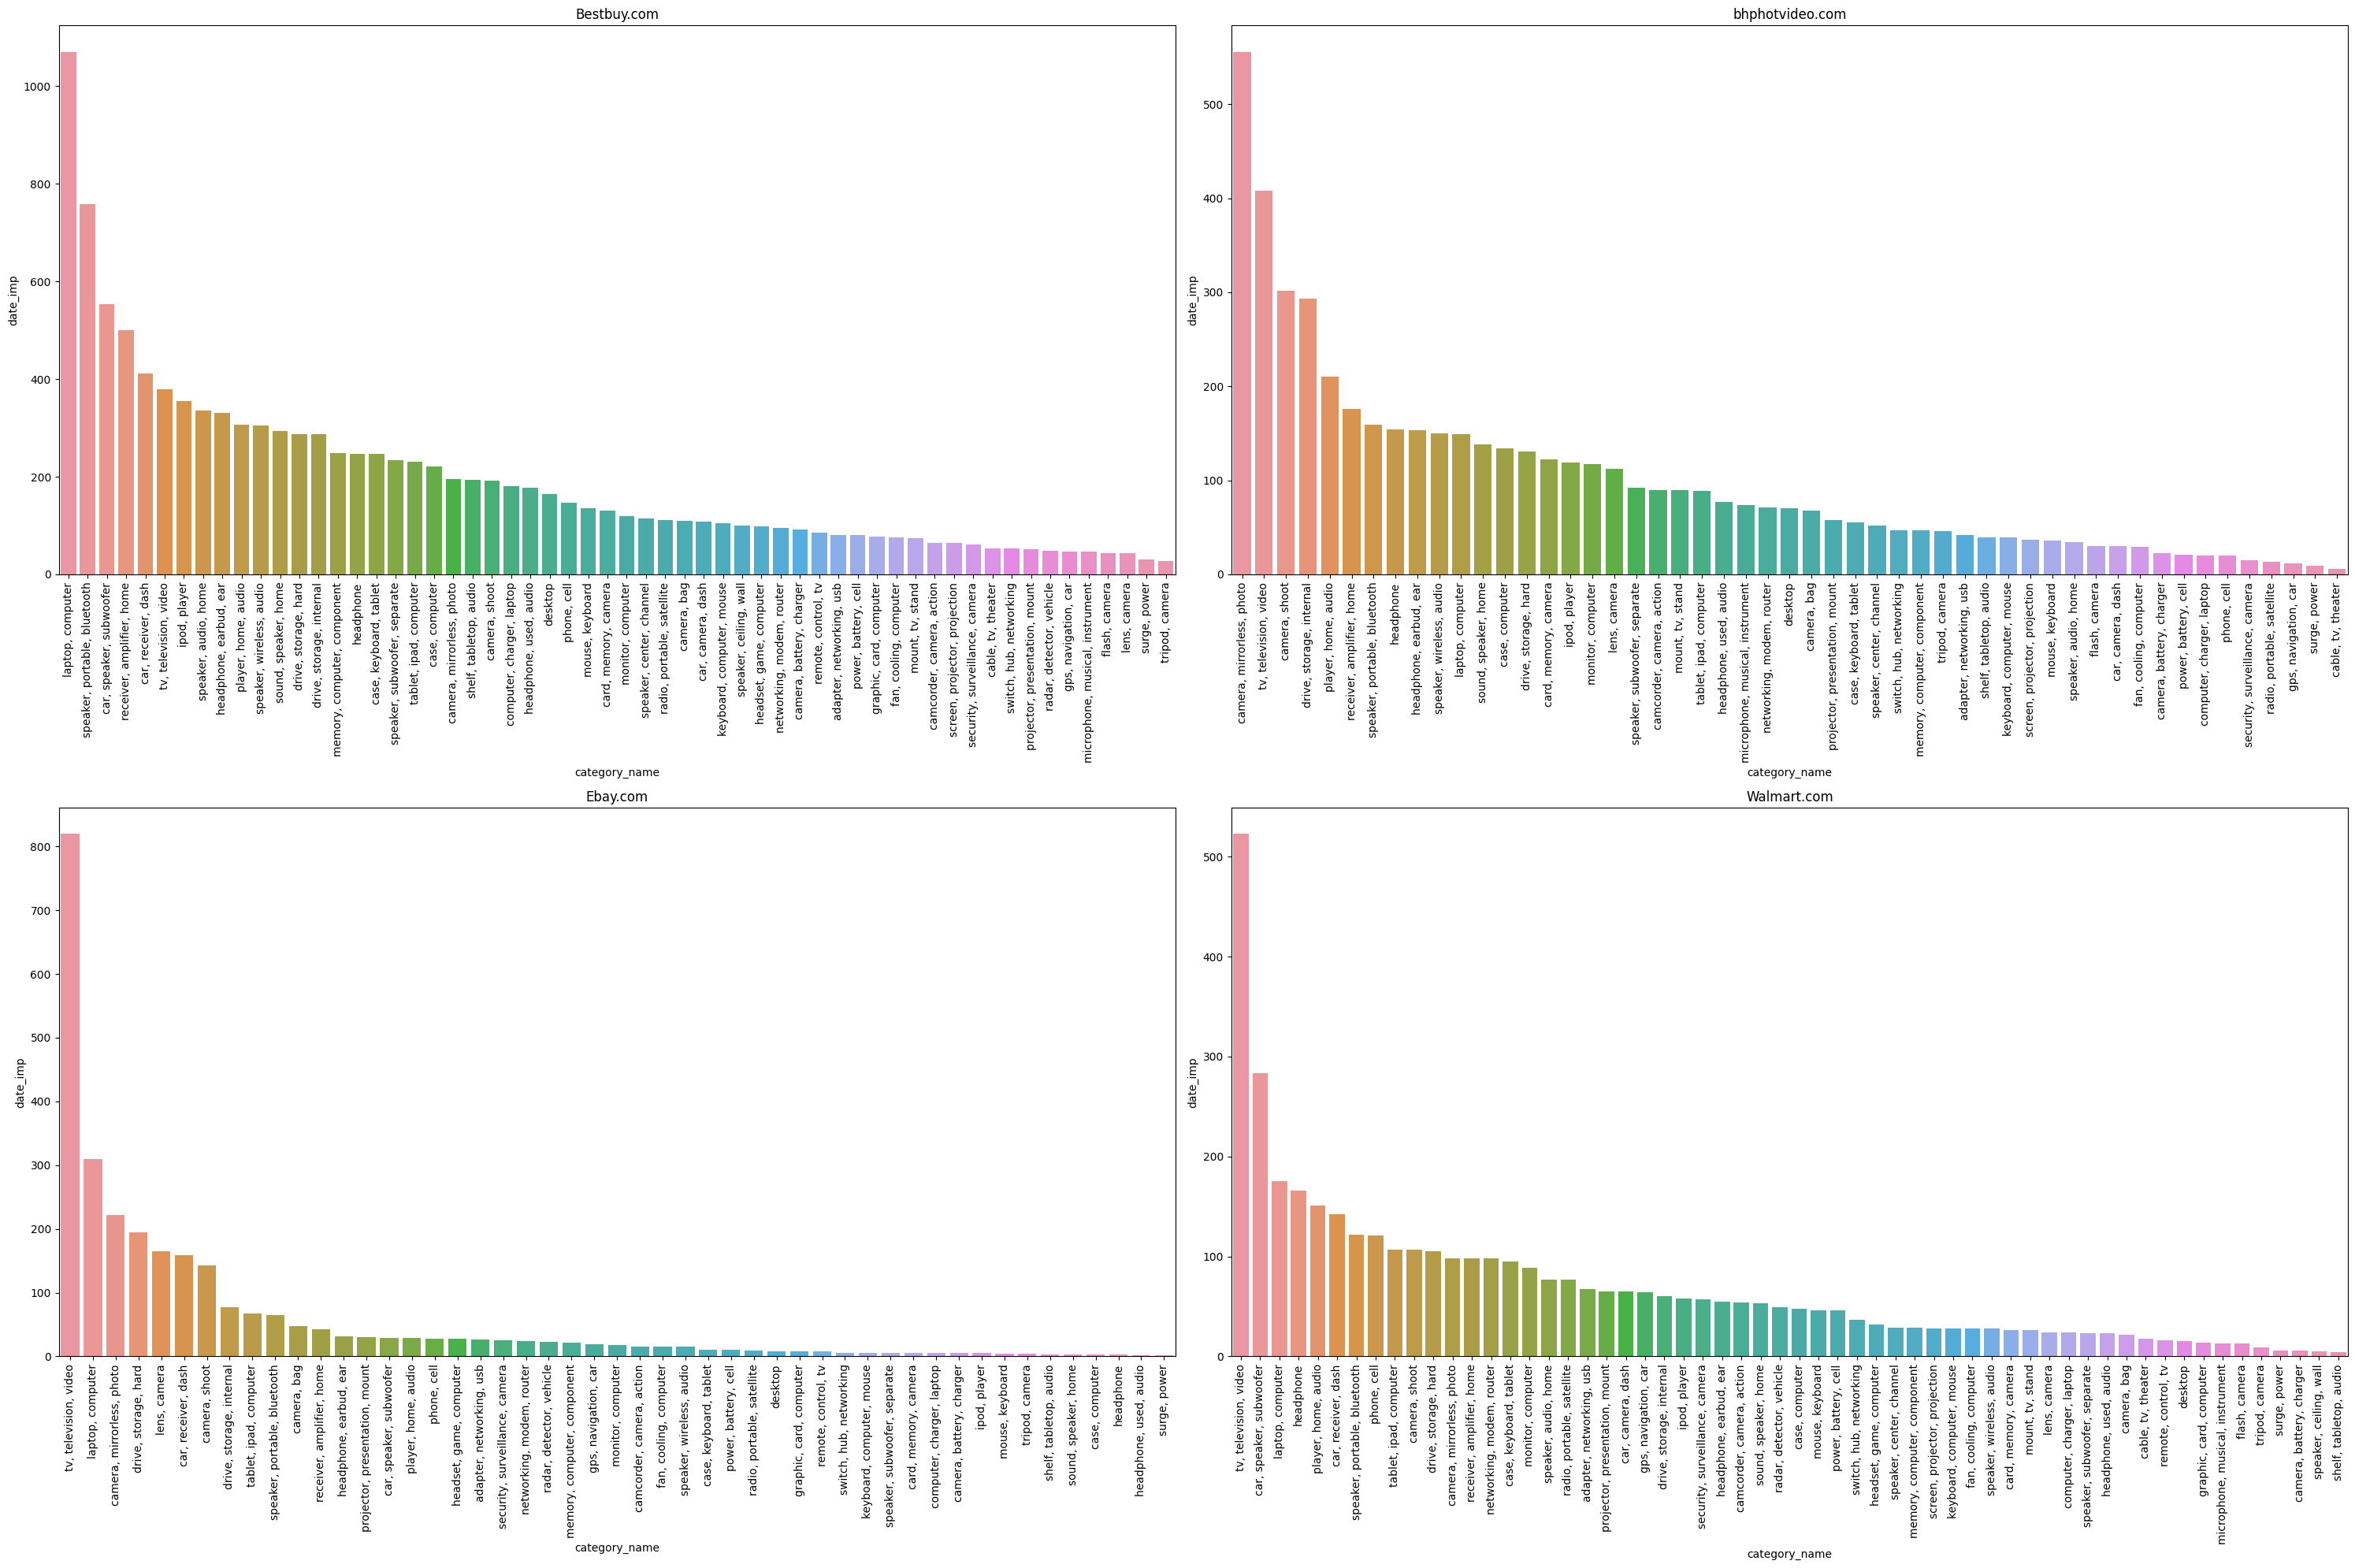

In [130]:
plt.figure(figsize=(30,20))


plt.subplot(2,2,1)
aux3 = df_best[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Bestbuy.com')
sns.barplot(x='category_name', y='date_imp', data=aux3)

plt.subplot(2,2,2)
aux4 = df_bhp[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('bhphotvideo.com')
sns.barplot(x='category_name', y='date_imp', data=aux4)

plt.subplot(2,2,3)
aux5 = df_ebay[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay.com')
sns.barplot(x='category_name', y='date_imp', data=aux5)

plt.subplot(2,2,4)
aux6 = df_walmart[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart.com')
sns.barplot(x='category_name', y='date_imp', data=aux6)

plt.tight_layout()

## 2.3 Qual a marca mais vendida?

### 2.3 Qual a marca mais vendida no geral

<AxesSubplot:xlabel='brand', ylabel='date_imp'>

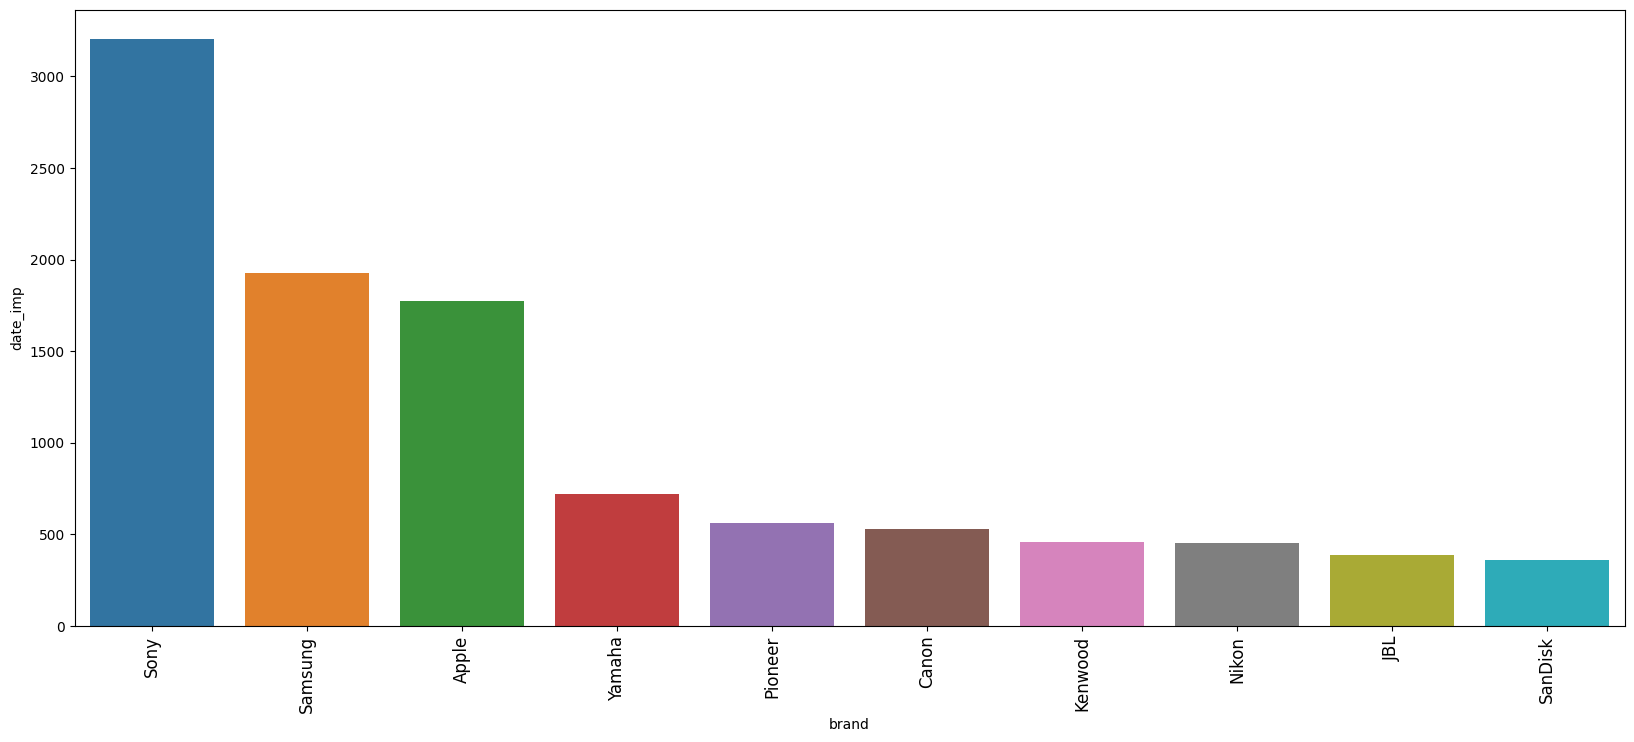

In [131]:
plt.figure(figsize=(20,8))
aux7 = df2[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
sns.barplot(x='brand', y='date_imp', data=aux7.head(10))

### 2.4 Qual a marca mais vendida por loja

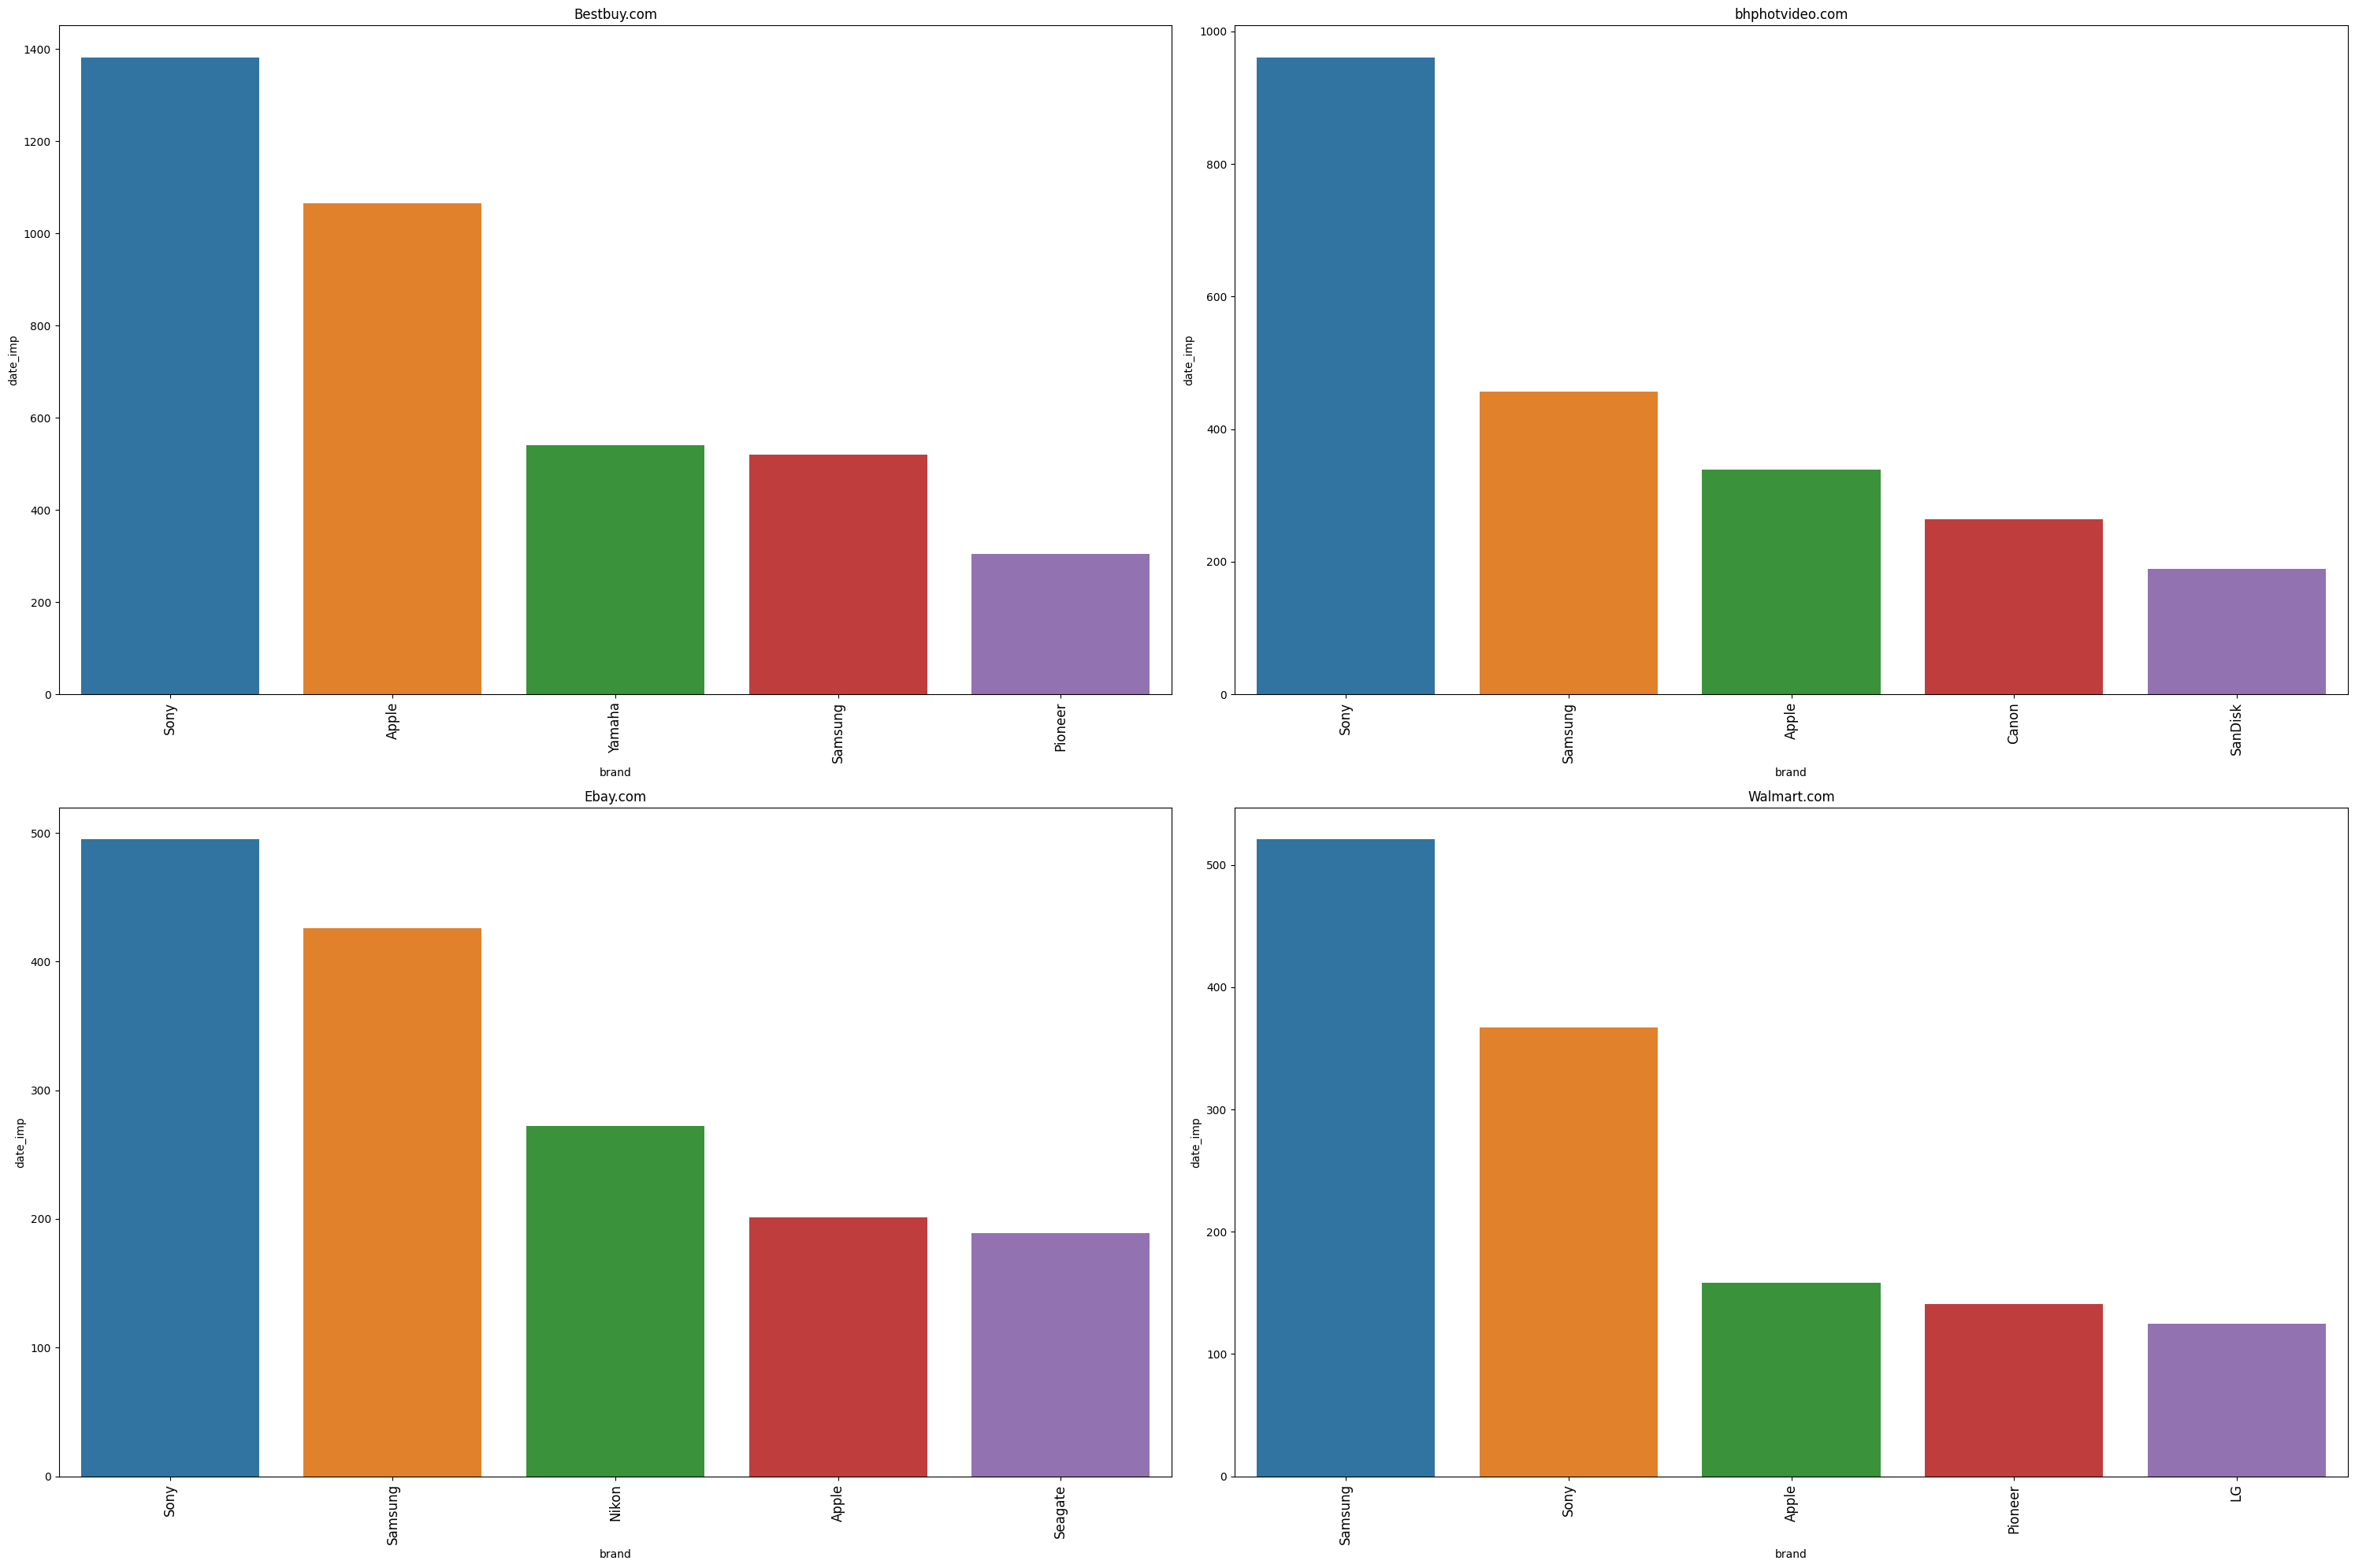

In [132]:
plt.figure(figsize=(30,20))


plt.subplot(2,2,1)
aux8 = df_best[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Bestbuy.com')
sns.barplot(x='brand', y='date_imp', data=aux8.head())

plt.subplot(2,2,2)
aux9 = df_bhp[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('bhphotvideo.com')
sns.barplot(x='brand', y='date_imp', data=aux9.head())

plt.subplot(2,2,3)
aux10 = df_ebay[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Ebay.com')
sns.barplot(x='brand', y='date_imp', data=aux10.head())

plt.subplot(2,2,4)
aux11 = df_walmart[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Walmart.com')
sns.barplot(x='brand', y='date_imp', data=aux11.head())

plt.tight_layout()

## 2.4 Quais os dias que mais vendem?

<AxesSubplot:xlabel='day_n', ylabel='date_imp'>

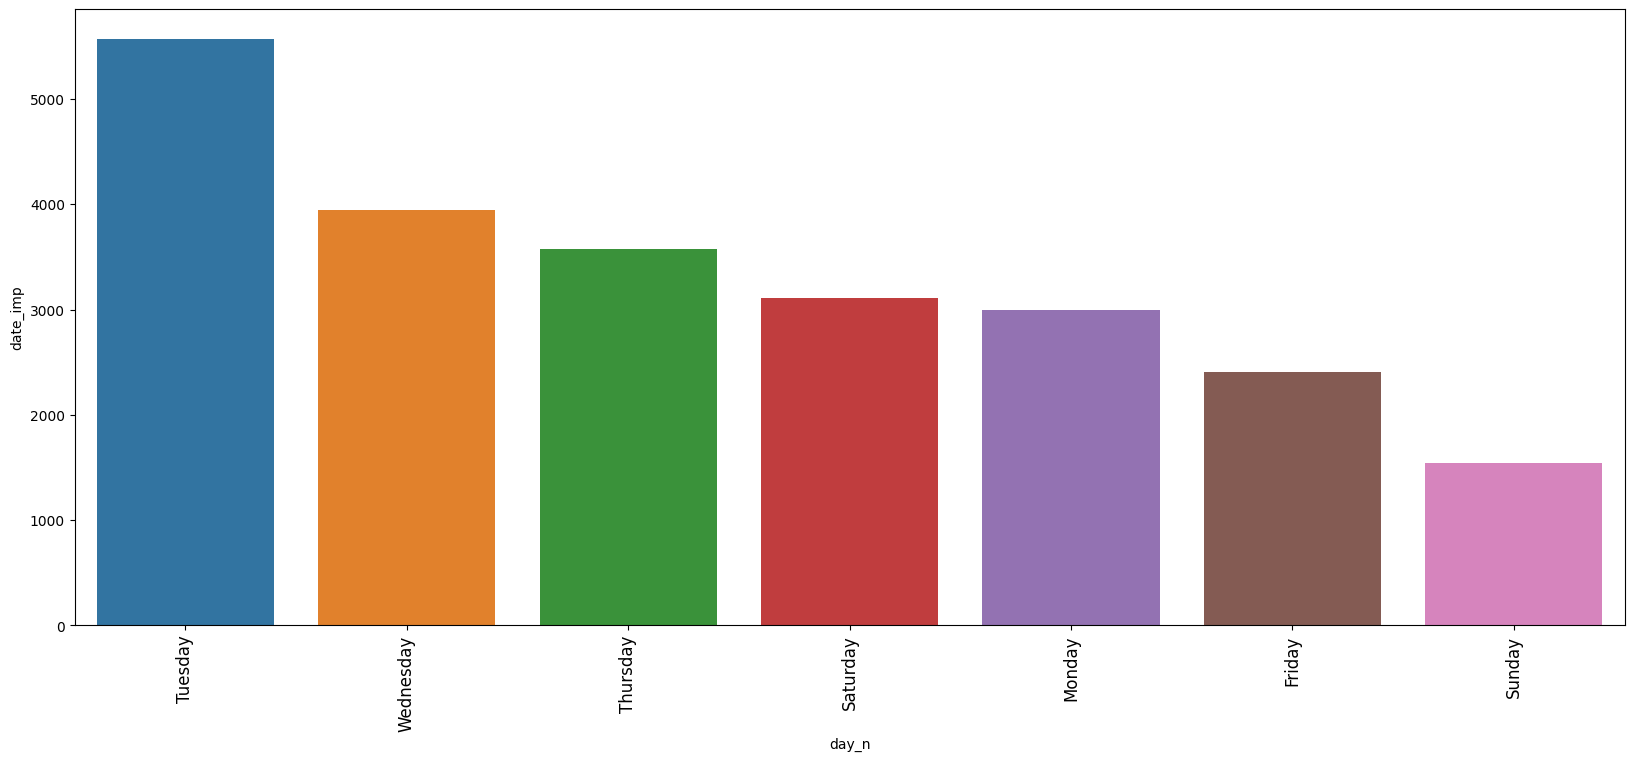

In [133]:
plt.figure(figsize=(20,8))
aux12 = df2[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
sns.barplot(x='day_n', y='date_imp', data=aux12)

### 2.4.1 Quais os dias que mais vendem por loja

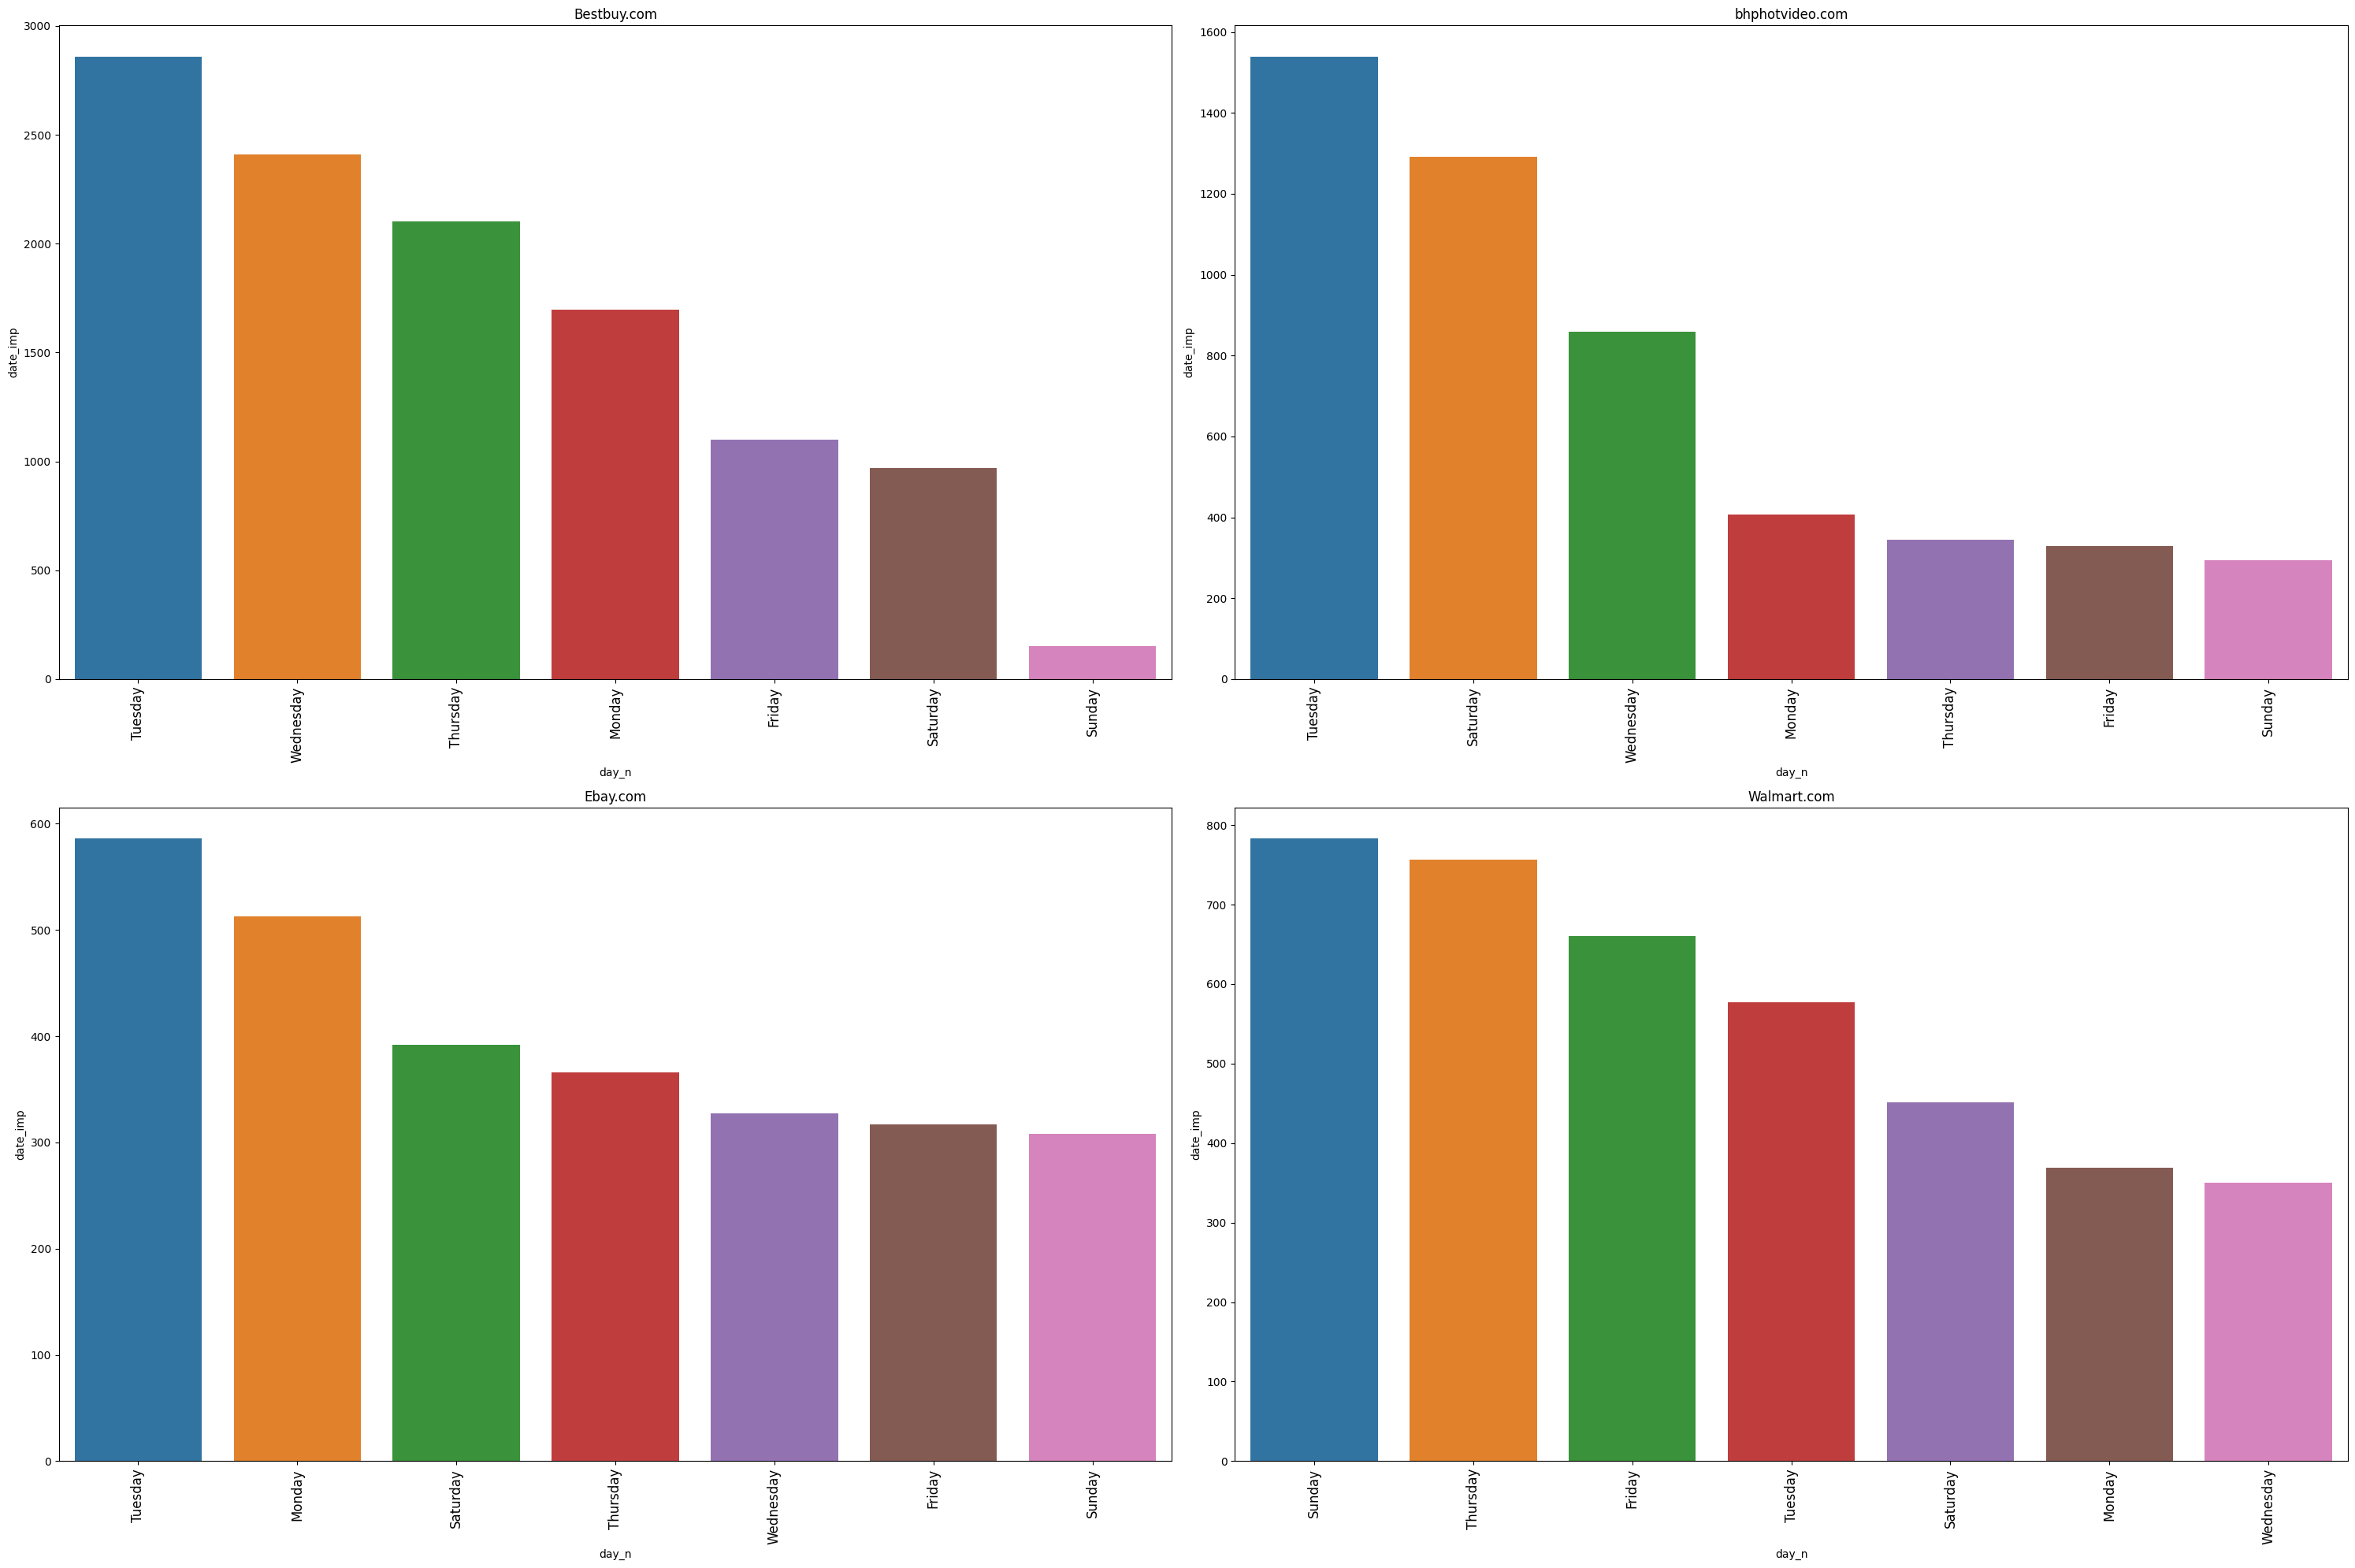

In [134]:
plt.figure(figsize=(30,20))


plt.subplot(2,2,1)
aux13 = df_best[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Bestbuy.com')
sns.barplot(x='day_n', y='date_imp', data=aux13)

plt.subplot(2,2,2)
aux14 = df_bhp[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('bhphotvideo.com')
sns.barplot(x='day_n', y='date_imp', data=aux14)

plt.subplot(2,2,3)
aux15 = df_ebay[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Ebay.com')
sns.barplot(x='day_n', y='date_imp', data=aux15)

plt.subplot(2,2,4)
aux16 = df_walmart[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Walmart.com')
sns.barplot(x='day_n', y='date_imp', data=aux16)

plt.tight_layout()

## 2.5 Quais os meses que mais vendem

<AxesSubplot:xlabel='month_n', ylabel='date_imp'>

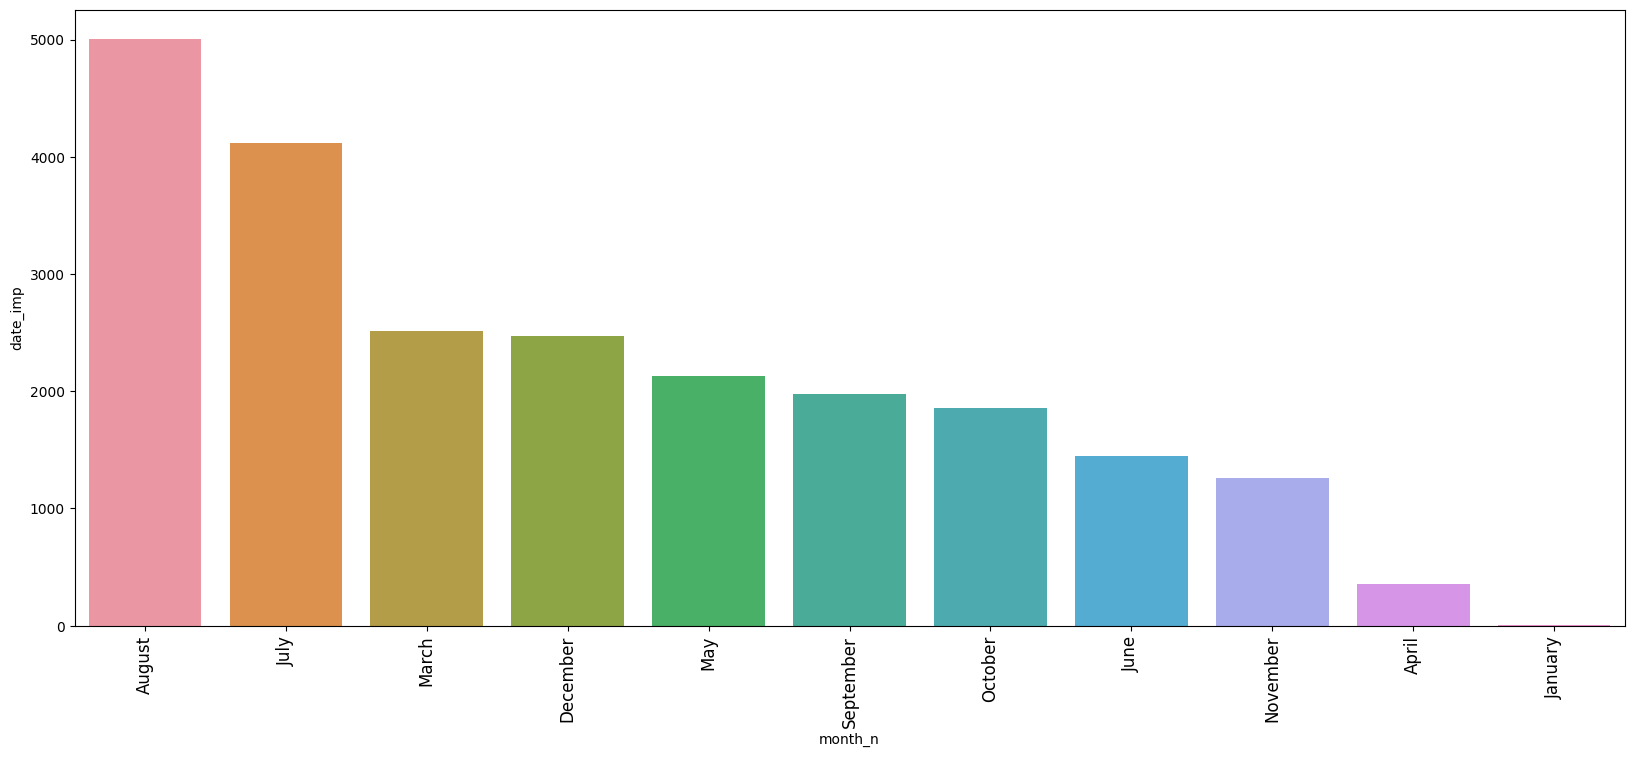

In [135]:
plt.figure(figsize=(20,8))
aux17 = df2[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
sns.barplot(x='month_n', y='date_imp', data=aux17)

### 2.4.1 Quais os meses que mais vendem por loja

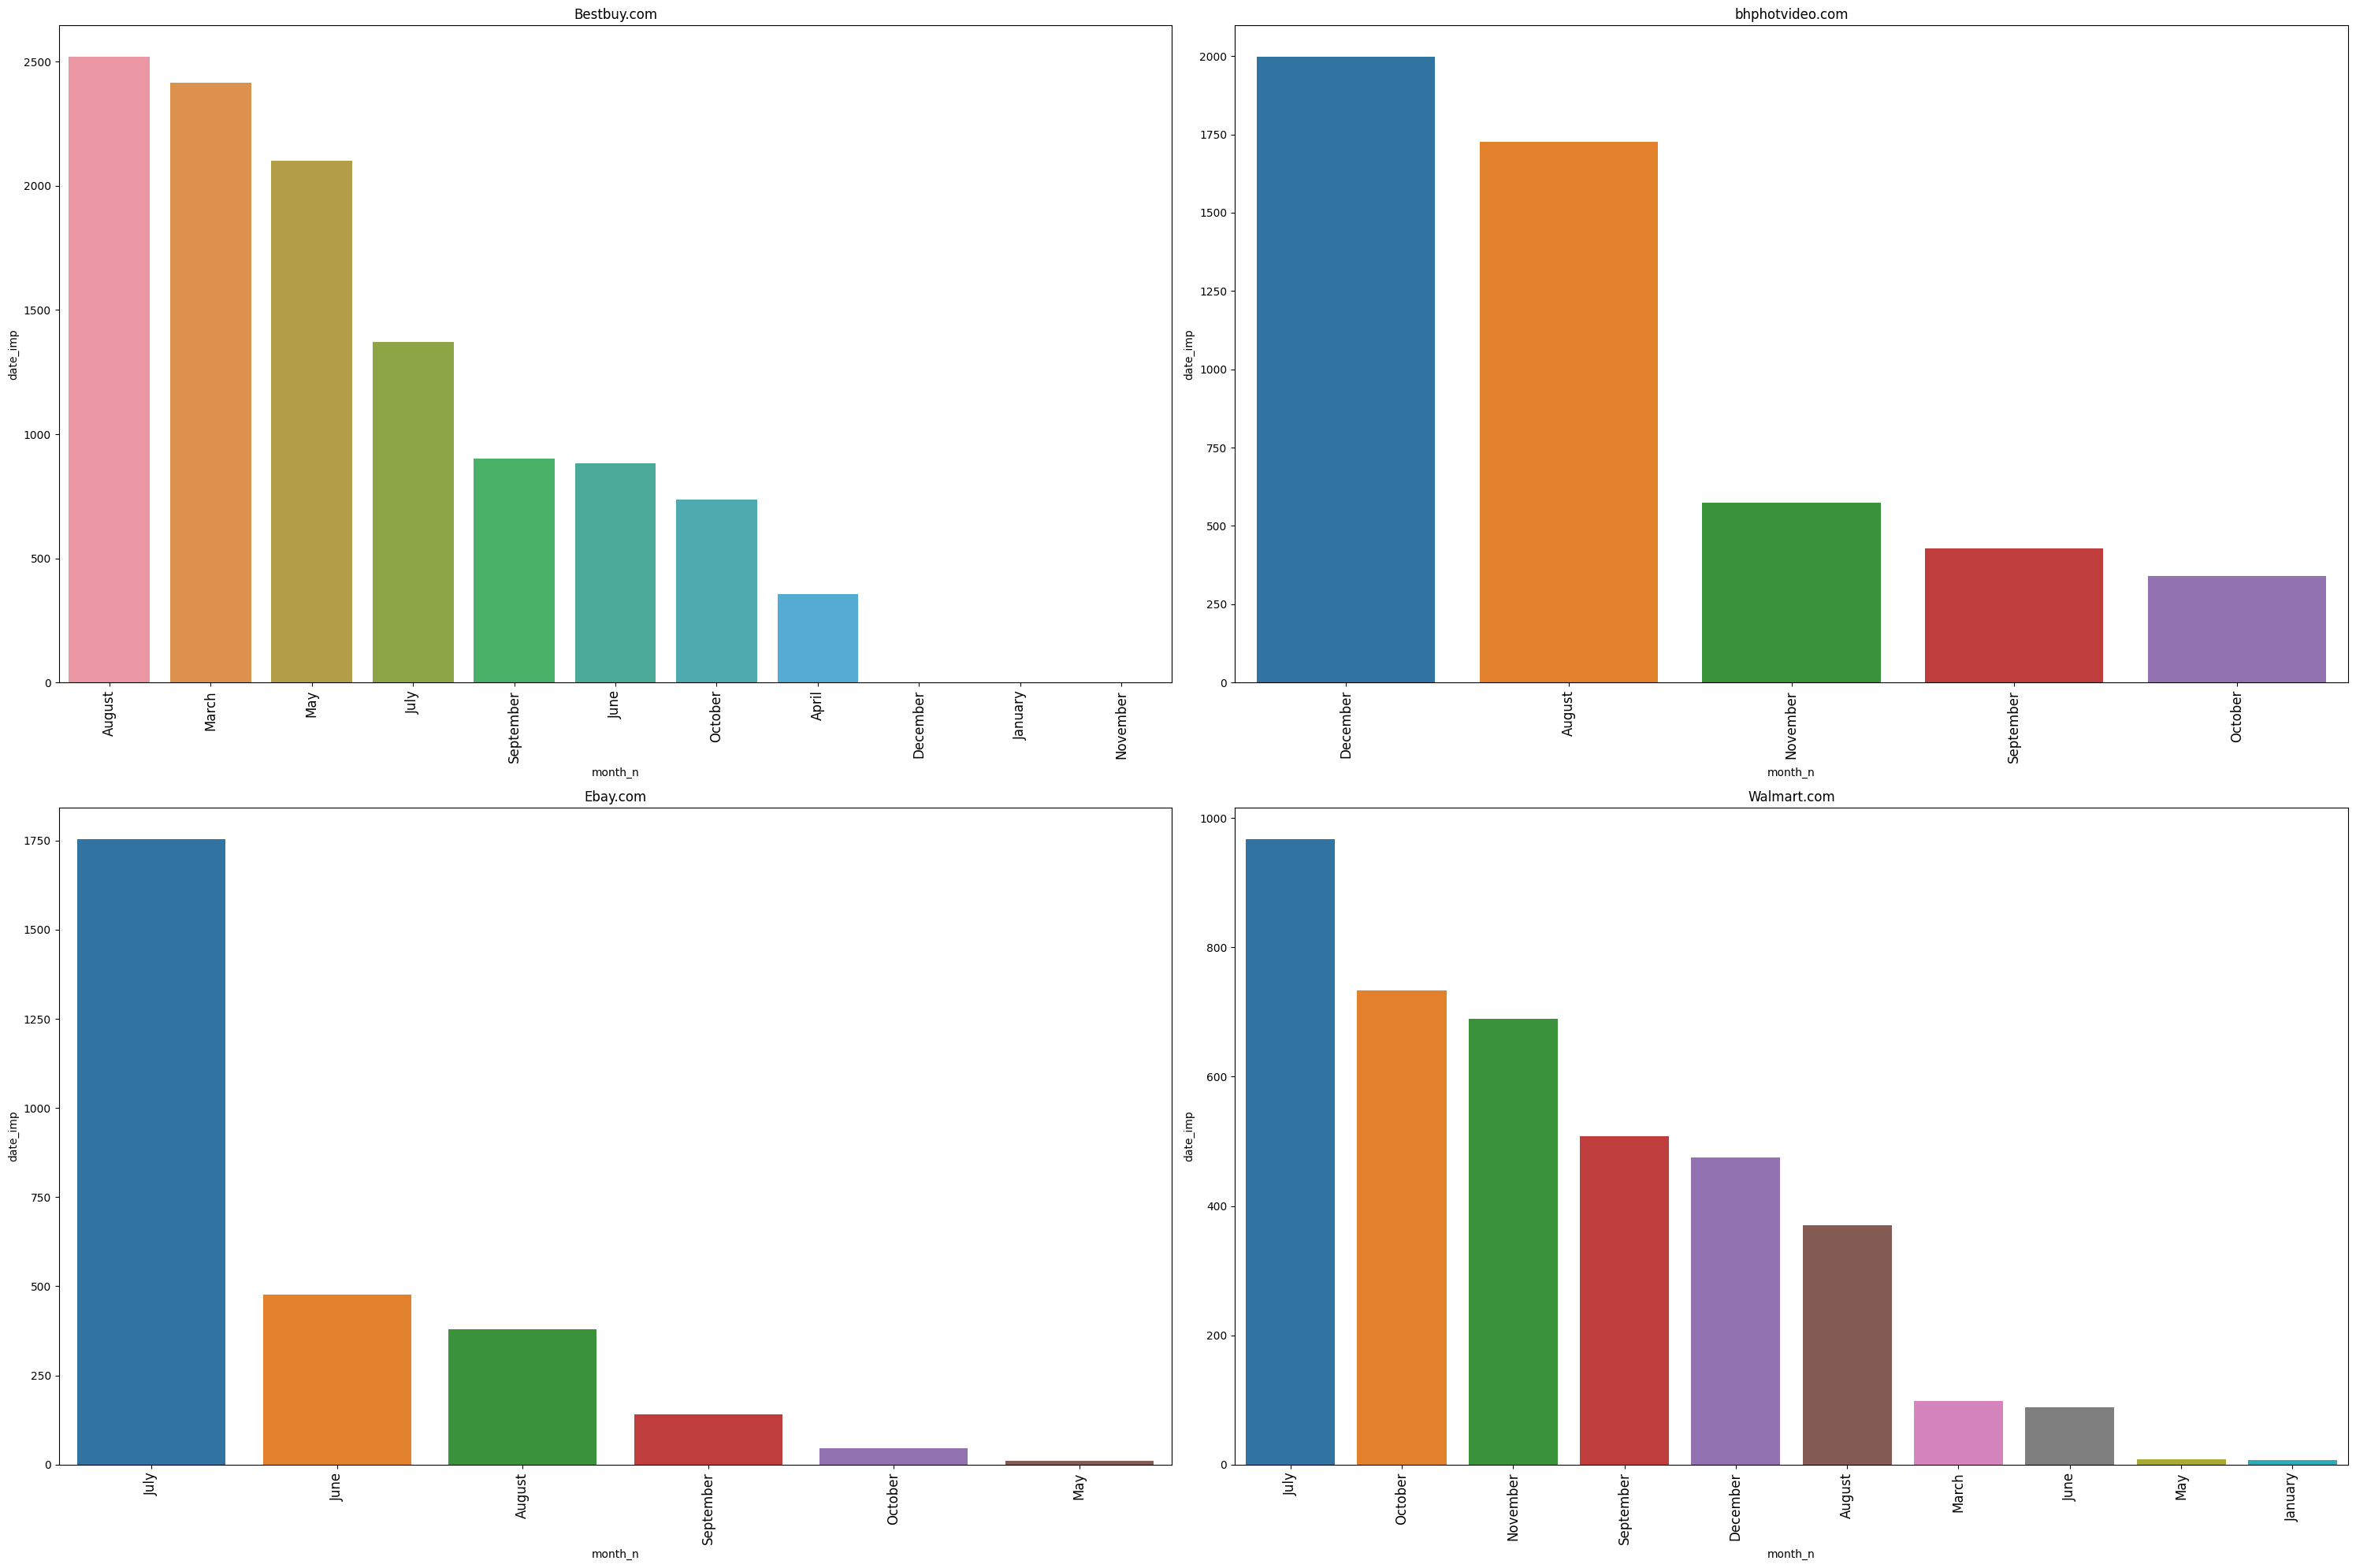

In [136]:
plt.figure(figsize=(30,20))


plt.subplot(2,2,1)
aux18 = df_best[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Bestbuy.com')
sns.barplot(x='month_n', y='date_imp', data=aux18)

plt.subplot(2,2,2)
aux19 = df_bhp[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('bhphotvideo.com')
sns.barplot(x='month_n', y='date_imp', data=aux19)

plt.subplot(2,2,3)
aux20 = df_ebay[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Ebay.com')
sns.barplot(x='month_n', y='date_imp', data=aux20)

plt.subplot(2,2,4)
aux21 = df_walmart[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Walmart.com')
sns.barplot(x='month_n', y='date_imp', data=aux21)

plt.tight_layout()

In [137]:
df2.columns

Index(['date_imp', 'category_name', 'name', 'price', 'disc_price', 'merchant',
       'disc_percentage', 'is_sale', 'imp_count', 'brand', 'p_description',
       'dateadded', 'dateseen', 'dateupdated', 'manufacturer', 'day_n',
       'month', 'month_n', 'day', 'week_number'],
      dtype='object')

## 2.5 Quais as semanas que mais vendem

<AxesSubplot:xlabel='week_number', ylabel='date_imp'>

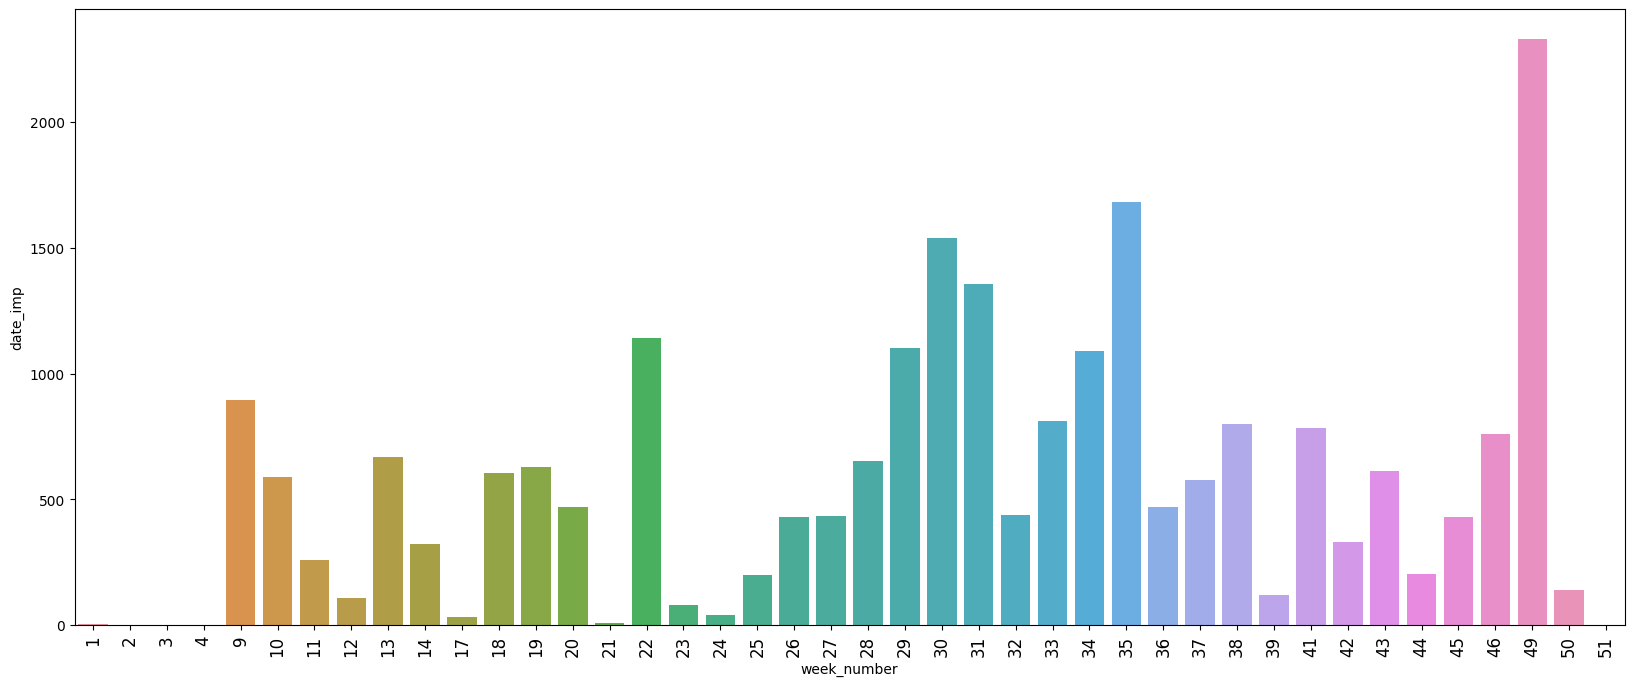

In [138]:
plt.figure(figsize=(20,8))
aux22 = df2[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
sns.barplot(x='week_number', y='date_imp', data=aux22)

### 2.5.1 Quais os semanas que mais vendem por loja

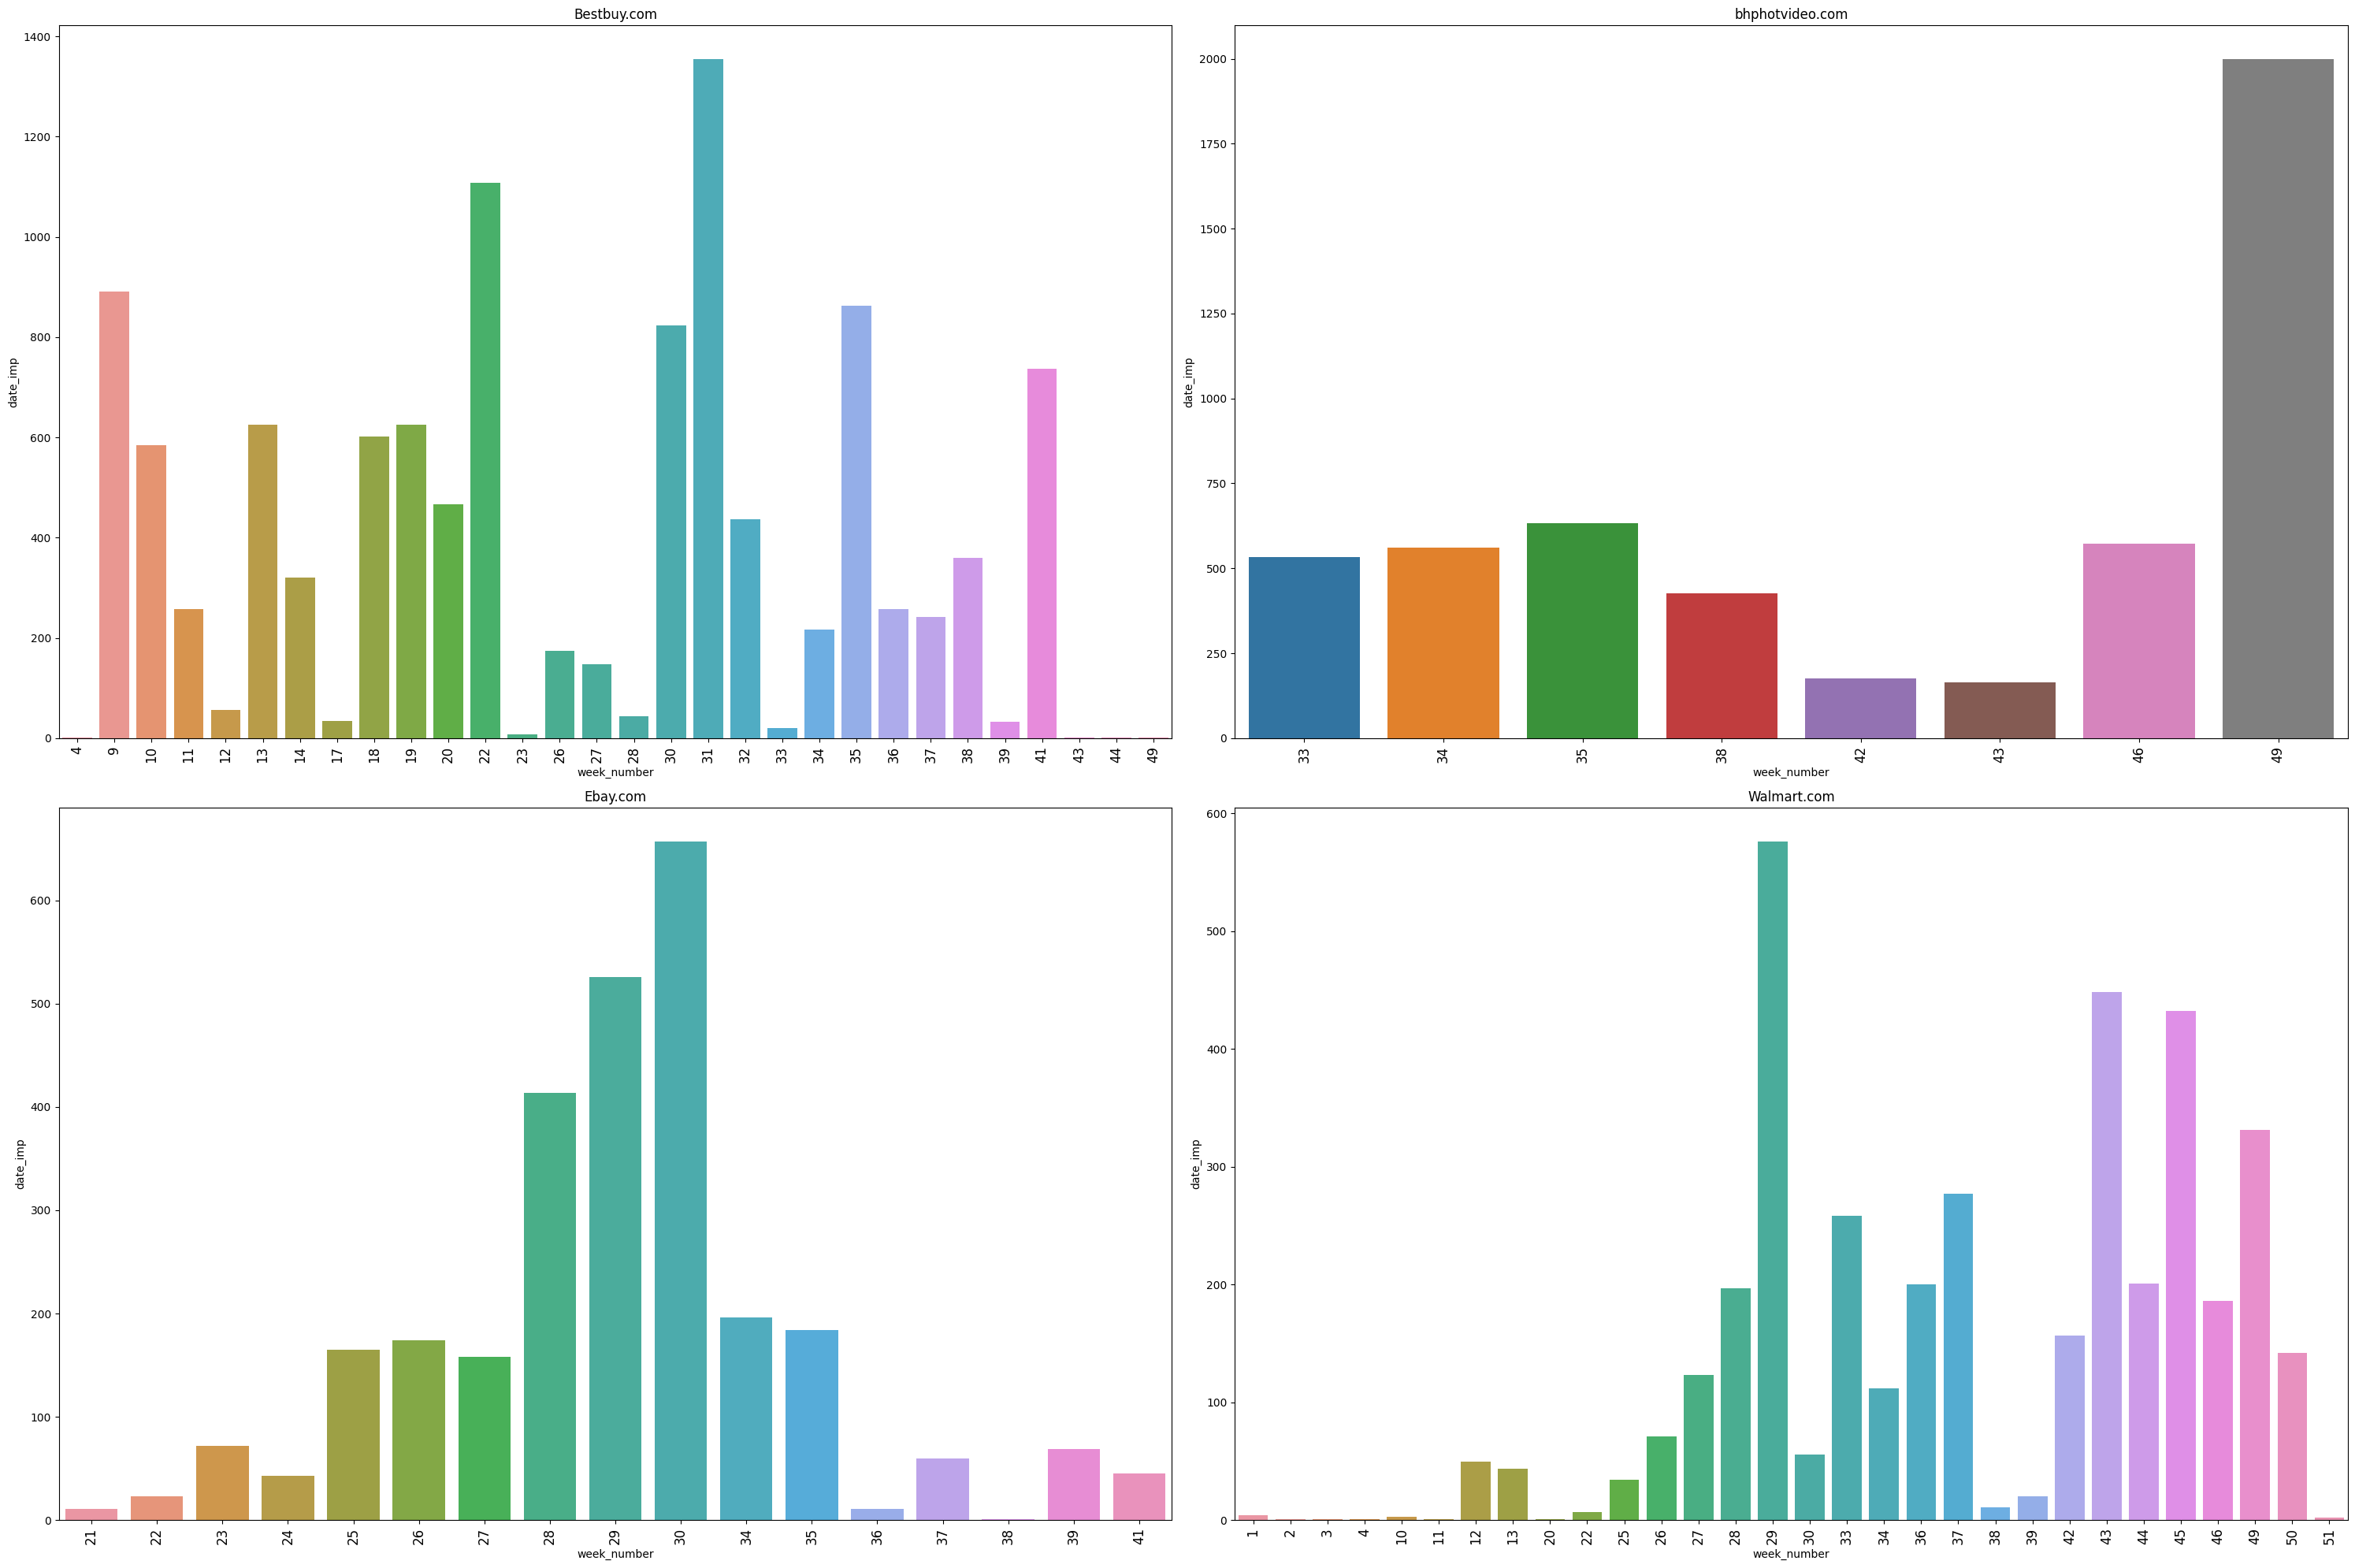

In [139]:
plt.figure(figsize=(30,20))


plt.subplot(2,2,1)
aux23 = df_best[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Bestbuy.com')
sns.barplot(x='week_number', y='date_imp', data=aux23)

plt.subplot(2,2,2)
aux24 = df_bhp[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('bhphotvideo.com')
sns.barplot(x='week_number', y='date_imp', data=aux24)

plt.subplot(2,2,3)
aux25 = df_ebay[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Ebay.com')
sns.barplot(x='week_number', y='date_imp', data=aux25)

plt.subplot(2,2,4)
aux26 = df_walmart[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Walmart.com')
sns.barplot(x='week_number', y='date_imp', data=aux26)

plt.tight_layout()

# 3.0 Feature Engineering

In [140]:
df3 = df2.copy()

## 3.1 Categoria mais vendida da Bestuy.com

In [141]:
df_category = df_best[df_best['category_name'] == 'speaker, portable, bluetooth']

In [142]:
# check NA
df_category.isna().sum()

date_imp             0
category_name        0
name                 0
price                0
disc_price           0
merchant             0
disc_percentage      0
is_sale              0
imp_count            0
brand                0
p_description        0
dateadded            0
dateseen             0
dateupdated          0
manufacturer       320
day_n                0
month                0
month_n              0
day                  0
week_number          0
dtype: int64

In [143]:
test = df_category.groupby(['name', 'week_number']).agg({'disc_price': 'mean', 'date_imp': 'count'}).reset_index()
test.head()

,name,week_number,disc_price,date_imp
0,BOOM 2 Wireless Bluetooth Speaker - Indigo,9,199.99,1
1,BOOM 2 Wireless Bluetooth Speaker - Indigo,10,149.99,2
2,BOOM 2 Wireless Bluetooth Speaker - Indigo,13,199.99,1
3,BOOM 2 Wireless Bluetooth Speaker - Indigo,18,199.99,1
4,BOOM 2 Wireless Bluetooth Speaker - Indigo,19,129.99,1


In [144]:
#criando dataframe dos valores(x)
x_price = test.pivot(index= 'week_number' , columns= 'name', values='disc_price')
x_price = pd.DataFrame(x_price.to_records())
x_price.head()

,week_number,BOOM 2 Wireless Bluetooth Speaker - Indigo,BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black,Bose® - Soundlink® Color Bluetooth Speaker II - Coral Red,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - Black,Chant Mini Portable Bluetooth Wireless Speaker (Navy),Chant Sport BT Portable Audio System (Black),Details About Logitech Ue Roll 2 Wireless Portable Bluetooth Waterproof Speaker,"DreamWave - Tremor Portable Bluetooth Speaker - Green,Black",...,Sony - XB20 Portable Bluetooth Speaker - Blue,Sony - XB7 Extra Bass Audio System with Bluetooth - Black,Sony SRSHG1/BLK Hi-Res Wireless Speaker- Charcoal black,Sony SRSXB3/BLK Portable Wireless Speaker with Bluetooth (Black),Sony Ultra-Portable Bluetooth Speaker,Tough Portable Bluetooth Speaker (Black and Silver),h.ear go Wireless Speaker (Lime Yellow),iHome Rechargeable Splash Proof Stereo Bluetooth Speaker - Black (IBT33BC),iLive - ISBW216 Wireless Gnome Outdoor Speaker - Multi,iPL24 FM Clock Radio with Lightning Dock and USB Port (Gunmetal)
0,9,199.99,179.99,129.99,64.99,139.99,47.99,99.99,NaN,290.99,...,NaN,187.99,149.99,149.99,49.99,229.99,199.99,32.99,33.99,46.99
1,10,149.99,129.99,129.99,64.99,99.99,47.99,99.99,NaN,290.99,...,NaN,187.99,149.99,99.99,48.99,229.99,199.99,32.99,33.99,45.99
2,11,NaN,129.99,129.99,NaN,99.99,47.99,99.99,NaN,290.99,...,NaN,NaN,149.99,99.99,48.99,229.99,199.99,32.99,33.99,NaN
3,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.99,NaN,149.99,NaN,NaN,NaN,199.99,NaN,NaN,NaN
4,13,199.99,103.99,129.99,64.99,79.99,47.99,99.99,NaN,290.99,...,99.99,218.49,149.99,99.99,49.99,146.99,199.99,49.99,33.99,69.99


In [145]:
y_demand = test.pivot(index= 'week_number' , columns= 'name', values='date_imp')
y_demand = pd.DataFrame(y_demand.to_records())
y_demand.head()

,week_number,BOOM 2 Wireless Bluetooth Speaker - Indigo,BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black,Bose® - Soundlink® Color Bluetooth Speaker II - Coral Red,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - Black,Chant Mini Portable Bluetooth Wireless Speaker (Navy),Chant Sport BT Portable Audio System (Black),Details About Logitech Ue Roll 2 Wireless Portable Bluetooth Waterproof Speaker,"DreamWave - Tremor Portable Bluetooth Speaker - Green,Black",...,Sony - XB20 Portable Bluetooth Speaker - Blue,Sony - XB7 Extra Bass Audio System with Bluetooth - Black,Sony SRSHG1/BLK Hi-Res Wireless Speaker- Charcoal black,Sony SRSXB3/BLK Portable Wireless Speaker with Bluetooth (Black),Sony Ultra-Portable Bluetooth Speaker,Tough Portable Bluetooth Speaker (Black and Silver),h.ear go Wireless Speaker (Lime Yellow),iHome Rechargeable Splash Proof Stereo Bluetooth Speaker - Black (IBT33BC),iLive - ISBW216 Wireless Gnome Outdoor Speaker - Multi,iPL24 FM Clock Radio with Lightning Dock and USB Port (Gunmetal)
0,9,1.0,1.0,3.0,2.0,1.0,1.0,1.0,NaN,1.0,...,NaN,4.0,2.0,3.0,3.0,1.0,1.0,1.0,1.0,2.0
1,10,2.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,1.0,...,NaN,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
2,11,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
3,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,13,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,1.0,...,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0


# Descrição dos novos dataframes

# 4.0 Descrição dos dados

In [146]:
# 4.1 Data Dimension

In [147]:
print(f'Number of rows: {x_price.shape[0]}')
print(f'Number of columns: {x_price.shape[1]}')

Number of rows: 23
Number of columns: 42


In [148]:
print(f'Number of rows: {y_demand.shape[0]}')
print(f'Number of columns: {y_demand.shape[1]}')

Number of rows: 23
Number of columns: 42


## 4.2 Data Types

In [149]:
x_price.dtypes

week_number                                                                                                                    int64
BOOM 2 Wireless Bluetooth Speaker - Indigo                                                                                   float64
BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black    float64
Bose® - Soundlink® Color Bluetooth Speaker II - Coral Red                                                                    float64
Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond                                                                  float64
Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - Black      float64
Chant Mini Portable Bluetooth Wireless Speaker (Navy)                                                                        float64
Chant Sport BT Portable Audio System (Black)                         

In [150]:
y_demand.dtypes

week_number                                                                                                                    int64
BOOM 2 Wireless Bluetooth Speaker - Indigo                                                                                   float64
BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black    float64
Bose® - Soundlink® Color Bluetooth Speaker II - Coral Red                                                                    float64
Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond                                                                  float64
Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - Black      float64
Chant Mini Portable Bluetooth Wireless Speaker (Navy)                                                                        float64
Chant Sport BT Portable Audio System (Black)                         

## 4.3 Check NA

In [151]:
x_price.isna().sum()

week_number                                                                                                                   0
BOOM 2 Wireless Bluetooth Speaker - Indigo                                                                                   12
BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black    19
Bose® - Soundlink® Color Bluetooth Speaker II - Coral Red                                                                     8
Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond                                                                  10
Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - Black      19
Chant Mini Portable Bluetooth Wireless Speaker (Navy)                                                                        10
Chant Sport BT Portable Audio System (Black)                                                            

In [152]:
y_demand.isna().sum()

week_number                                                                                                                   0
BOOM 2 Wireless Bluetooth Speaker - Indigo                                                                                   12
BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black    19
Bose® - Soundlink® Color Bluetooth Speaker II - Coral Red                                                                     8
Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond                                                                  10
Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - Black      19
Chant Mini Portable Bluetooth Wireless Speaker (Navy)                                                                        10
Chant Sport BT Portable Audio System (Black)                                                            

## 4.5 Replace NA

In [153]:
a = np.round(x_price.median(), 2)
x_price.fillna(a, inplace=True)
x_price.head()

,week_number,BOOM 2 Wireless Bluetooth Speaker - Indigo,BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black,Bose® - Soundlink® Color Bluetooth Speaker II - Coral Red,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - Black,Chant Mini Portable Bluetooth Wireless Speaker (Navy),Chant Sport BT Portable Audio System (Black),Details About Logitech Ue Roll 2 Wireless Portable Bluetooth Waterproof Speaker,"DreamWave - Tremor Portable Bluetooth Speaker - Green,Black",...,Sony - XB20 Portable Bluetooth Speaker - Blue,Sony - XB7 Extra Bass Audio System with Bluetooth - Black,Sony SRSHG1/BLK Hi-Res Wireless Speaker- Charcoal black,Sony SRSXB3/BLK Portable Wireless Speaker with Bluetooth (Black),Sony Ultra-Portable Bluetooth Speaker,Tough Portable Bluetooth Speaker (Black and Silver),h.ear go Wireless Speaker (Lime Yellow),iHome Rechargeable Splash Proof Stereo Bluetooth Speaker - Black (IBT33BC),iLive - ISBW216 Wireless Gnome Outdoor Speaker - Multi,iPL24 FM Clock Radio with Lightning Dock and USB Port (Gunmetal)
0,9,199.99,179.99,129.99,64.99,139.99,47.99,99.99,99.99,290.99,...,79.99,187.99,149.99,149.99,49.99,229.99,199.99,32.99,33.99,46.99
1,10,149.99,129.99,129.99,64.99,99.99,47.99,99.99,99.99,290.99,...,79.99,187.99,149.99,99.99,48.99,229.99,199.99,32.99,33.99,45.99
2,11,199.99,129.99,129.99,64.99,99.99,47.99,99.99,99.99,290.99,...,79.99,255.49,149.99,99.99,48.99,229.99,199.99,32.99,33.99,69.99
3,12,199.99,129.99,129.99,64.99,99.99,41.99,78.49,99.99,290.99,...,99.99,255.49,149.99,149.99,66.49,146.99,199.99,37.99,33.99,69.99
4,13,199.99,103.99,129.99,64.99,79.99,47.99,99.99,99.99,290.99,...,99.99,218.49,149.99,99.99,49.99,146.99,199.99,49.99,33.99,69.99


In [154]:
y_demand.fillna(0, inplace=True)
y_demand.head()

,week_number,BOOM 2 Wireless Bluetooth Speaker - Indigo,BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black,Bose® - Soundlink® Color Bluetooth Speaker II - Coral Red,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - Black,Chant Mini Portable Bluetooth Wireless Speaker (Navy),Chant Sport BT Portable Audio System (Black),Details About Logitech Ue Roll 2 Wireless Portable Bluetooth Waterproof Speaker,"DreamWave - Tremor Portable Bluetooth Speaker - Green,Black",...,Sony - XB20 Portable Bluetooth Speaker - Blue,Sony - XB7 Extra Bass Audio System with Bluetooth - Black,Sony SRSHG1/BLK Hi-Res Wireless Speaker- Charcoal black,Sony SRSXB3/BLK Portable Wireless Speaker with Bluetooth (Black),Sony Ultra-Portable Bluetooth Speaker,Tough Portable Bluetooth Speaker (Black and Silver),h.ear go Wireless Speaker (Lime Yellow),iHome Rechargeable Splash Proof Stereo Bluetooth Speaker - Black (IBT33BC),iLive - ISBW216 Wireless Gnome Outdoor Speaker - Multi,iPL24 FM Clock Radio with Lightning Dock and USB Port (Gunmetal)
0,9,1.0,1.0,3.0,2.0,1.0,1.0,1.0,0.0,1.0,...,0.0,4.0,2.0,3.0,3.0,1.0,1.0,1.0,1.0,2.0
1,10,2.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
2,11,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0


# 4.6 Descriptive Statistics

In [155]:
# central tendency
ct1_x = pd.DataFrame(x_price.apply(np.mean) ).T   # média
ct2_x = pd.DataFrame(x_price.apply(np.median) ).T  # mediana

# dispersion
d1_x = pd.DataFrame(x_price.apply(np.std) ).T # Desvio padrão
d2_x = pd.DataFrame(x_price.apply(min) ).T # valor mínimo
d3_x = pd.DataFrame(x_price.apply(max) ).T # valor máximo
d4_x = pd.DataFrame(x_price.apply( lambda x: x.max() - x.min())).T # Variação entre o mínimo e máxilo valor
d5_x = pd.DataFrame(x_price.apply( lambda x: x.skew())).T #skewness
d6_x = pd.DataFrame(x_price.apply( lambda x : x.kurtosis())).T # kurtosis

m_x = pd.concat( [d2_x, d3_x, d4_x, ct1_x, ct2_x, d1_x, d5_x, d6_x]).T.reset_index()
m_x.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']
m_x

,att,min,max,range,mean,median,std,skew,kurt
0,week_number,9.00,41.00,32.00,24.826087,26.00,10.374099,-0.036892,-1.499963
1,BOOM 2 Wireless Bluetooth Speaker - Indigo,129.99,199.99,70.00,189.555217,199.99,21.157435,-1.856673,2.042462
2,BRAVEN BRV-HD Wireless Bluetooth Speaker [28 H...,103.99,179.99,76.00,131.033478,129.99,11.704619,2.832777,14.829604
3,Bose® - Soundlink® Color Bluetooth Speaker II ...,116.99,129.99,13.00,129.424783,129.99,2.651105,-4.795832,23.000000
4,Boytone - 2500W 2.1-Ch. Home Theater System - ...,64.99,69.99,5.00,65.337826,64.99,1.087826,3.785403,15.134999
5,Braven BRV-BLADE Wireless Portable Bluetooth S...,79.99,139.99,60.00,100.859565,99.99,9.284416,2.956909,15.184672
6,Chant Mini Portable Bluetooth Wireless Speaker...,39.99,49.99,10.00,43.337826,41.99,3.265214,1.087841,-0.430518
7,Chant Sport BT Portable Audio System (Black),65.99,99.99,34.00,79.055217,78.49,10.997336,0.816480,0.067231
8,Details About Logitech Ue Roll 2 Wireless Port...,69.99,99.99,30.00,98.685652,99.99,6.117934,-4.795832,23.000000
9,DreamWave - Tremor Portable Bluetooth Speaker ...,279.99,290.99,11.00,290.381304,290.99,2.240713,-4.627941,21.829549


In [156]:
# central tendency
ct1_y = pd.DataFrame(y_demand.apply(np.mean) ).T   # média
ct2_y = pd.DataFrame(y_demand.apply(np.median) ).T  # mediana

# dispersion
d1_y = pd.DataFrame(y_demand.apply(np.std) ).T # Desvio padrão
d2_y = pd.DataFrame(y_demand.apply(min) ).T # valor mínimo
d3_y = pd.DataFrame(y_demand.apply(max) ).T # valor máximo
d4_y = pd.DataFrame(y_demand.apply( lambda x: x.max() - x.min())).T # Variação entre o mínimo e máxilo valor
d5_y = pd.DataFrame(y_demand.apply( lambda x: x.skew())).T #skewness
d6_y = pd.DataFrame(y_demand.apply( lambda x : x.kurtosis())).T # kurtosis

m_y = pd.concat( [d2_y, d3_y, d4_y, ct1_y, ct2_y, d1_y, d5_y, d6_y]).T.reset_index()
m_y.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']
m_y

,att,min,max,range,mean,median,std,skew,kurt
0,week_number,9.0,41.0,32.0,24.826087,26.0,10.374099,-0.036892,-1.499963
1,BOOM 2 Wireless Bluetooth Speaker - Indigo,0.0,2.0,2.0,0.695652,0.0,0.804054,0.647303,-1.190300
2,BRAVEN BRV-HD Wireless Bluetooth Speaker [28 H...,0.0,1.0,1.0,0.173913,0.0,0.379035,1.843064,1.521805
3,Bose® - Soundlink® Color Bluetooth Speaker II ...,0.0,3.0,3.0,0.913043,1.0,0.829512,0.664476,0.019204
4,Boytone - 2500W 2.1-Ch. Home Theater System - ...,0.0,2.0,2.0,0.652174,1.0,0.633053,0.474721,-0.540406
5,Braven BRV-BLADE Wireless Portable Bluetooth S...,0.0,1.0,1.0,0.173913,0.0,0.379035,1.843064,1.521805
6,Chant Mini Portable Bluetooth Wireless Speaker...,0.0,2.0,2.0,0.652174,1.0,0.633053,0.474721,-0.540406
7,Chant Sport BT Portable Audio System (Black),0.0,2.0,2.0,0.652174,1.0,0.633053,0.474721,-0.540406
8,Details About Logitech Ue Roll 2 Wireless Port...,0.0,2.0,2.0,0.347826,0.0,0.560178,1.457427,1.411298
9,DreamWave - Tremor Portable Bluetooth Speaker ...,0.0,2.0,2.0,0.652174,1.0,0.633053,0.474721,-0.540406


# 5.0 EDA

<AxesSubplot:xlabel='products', ylabel='demand'>

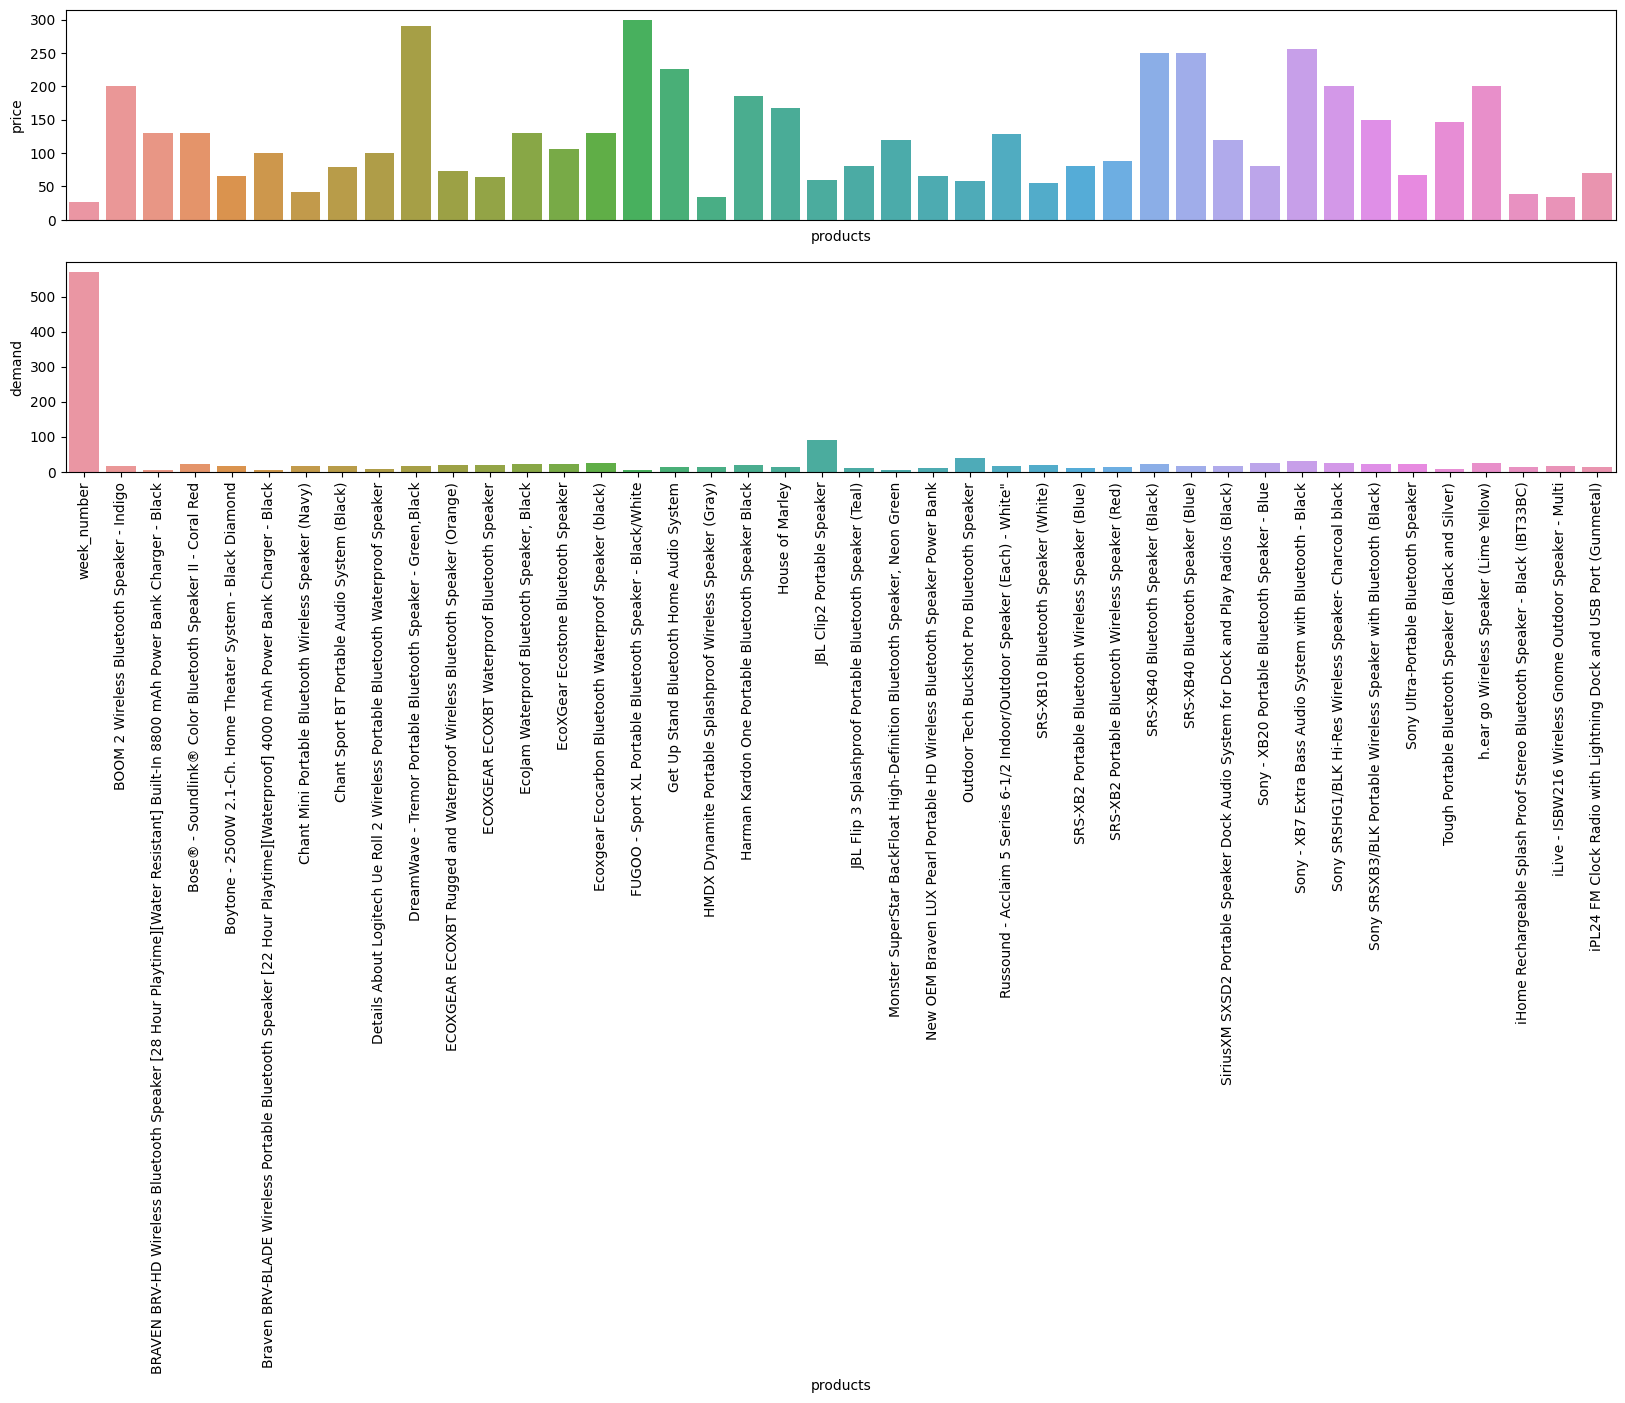

In [157]:
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1)
aux1 = pd.DataFrame(x_price.apply( lambda x: x.median())).reset_index()
aux1.columns = ['products', 'price']
sns.barplot(x='products', y='price', data=aux1)
plt.xticks([])

plt.subplot(2, 1, 2)
aux2 = pd.DataFrame(y_demand.apply( lambda x: x.sum())).reset_index()
aux2.columns = ['products', 'demand']
plt.xticks(rotation=90)
sns.barplot(x='products', y='demand', data=aux2)

In [158]:
x_price.columns

Index(['week_number', 'BOOM 2 Wireless Bluetooth Speaker - Indigo',
       'BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black',
       'Bose® - Soundlink® Color Bluetooth Speaker II - Coral Red',
       'Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond',
       'Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - Black',
       'Chant Mini Portable Bluetooth Wireless Speaker (Navy)',
       'Chant Sport BT Portable Audio System (Black)',
       'Details About Logitech Ue Roll 2 Wireless Portable Bluetooth Waterproof Speaker',
       'DreamWave - Tremor Portable Bluetooth Speaker - Green,Black',
       'ECOXGEAR ECOXBT Rugged and Waterproof Wireless Bluetooth Speaker (Orange)',
       'ECOXGEAR ECOXBT Waterproof Bluetooth Speaker',
       'EcoJam Waterproof Bluetooth Speaker, Black',
       'EcoXGear Ecostone Bluetooth Speaker',
       'Ecoxgea

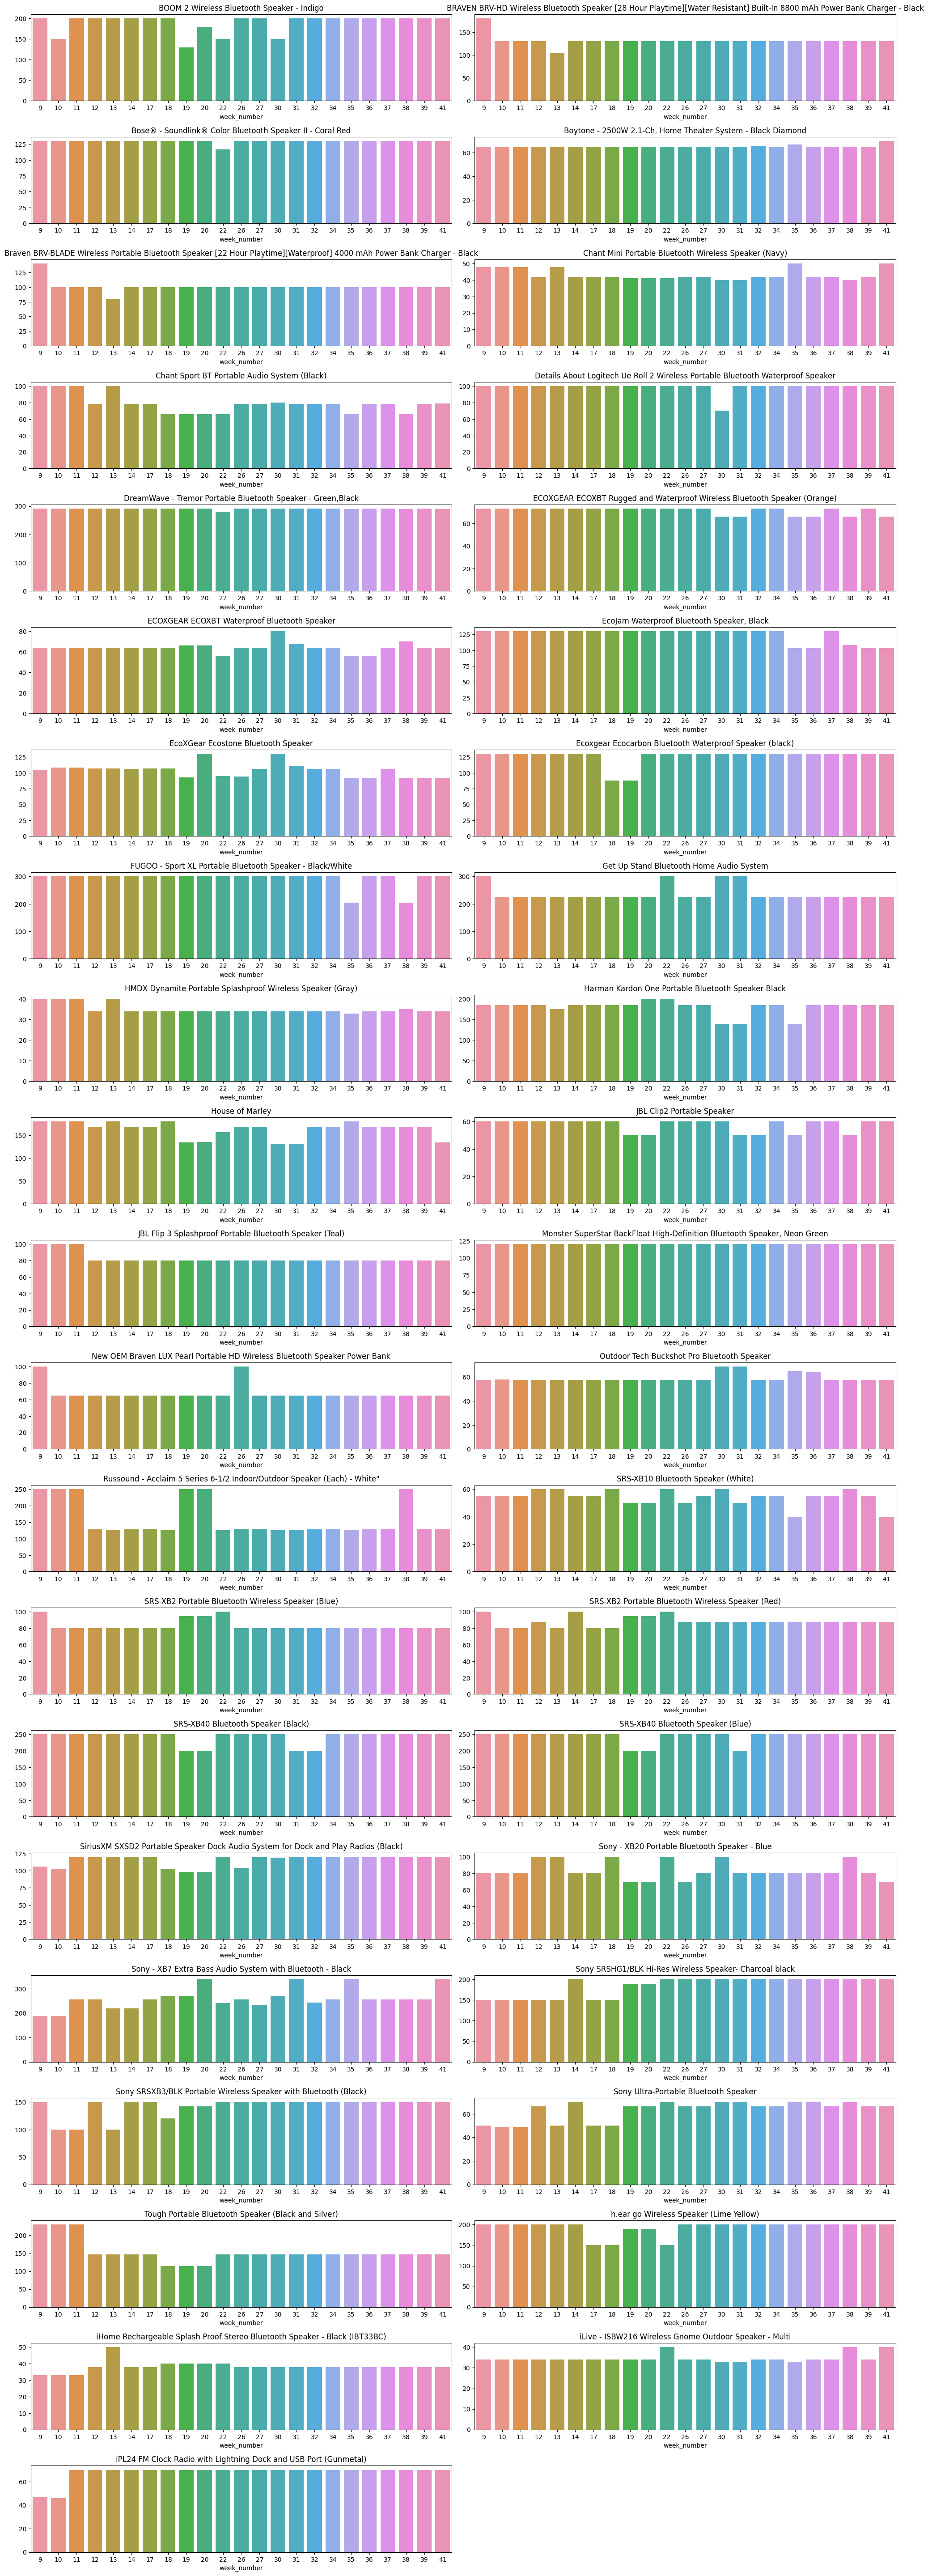

In [159]:
plt.figure(figsize=(20, 60))
for k in np.arange(1, len(x_price.columns), 1):
    plt.subplot(22,2,k)
    sns.barplot(data=x_price, x=x_price['week_number'], y=x_price[x_price.columns[k]]);
    plt.title(x_price.columns[k])
    plt.ylabel('')
    plt.tight_layout()

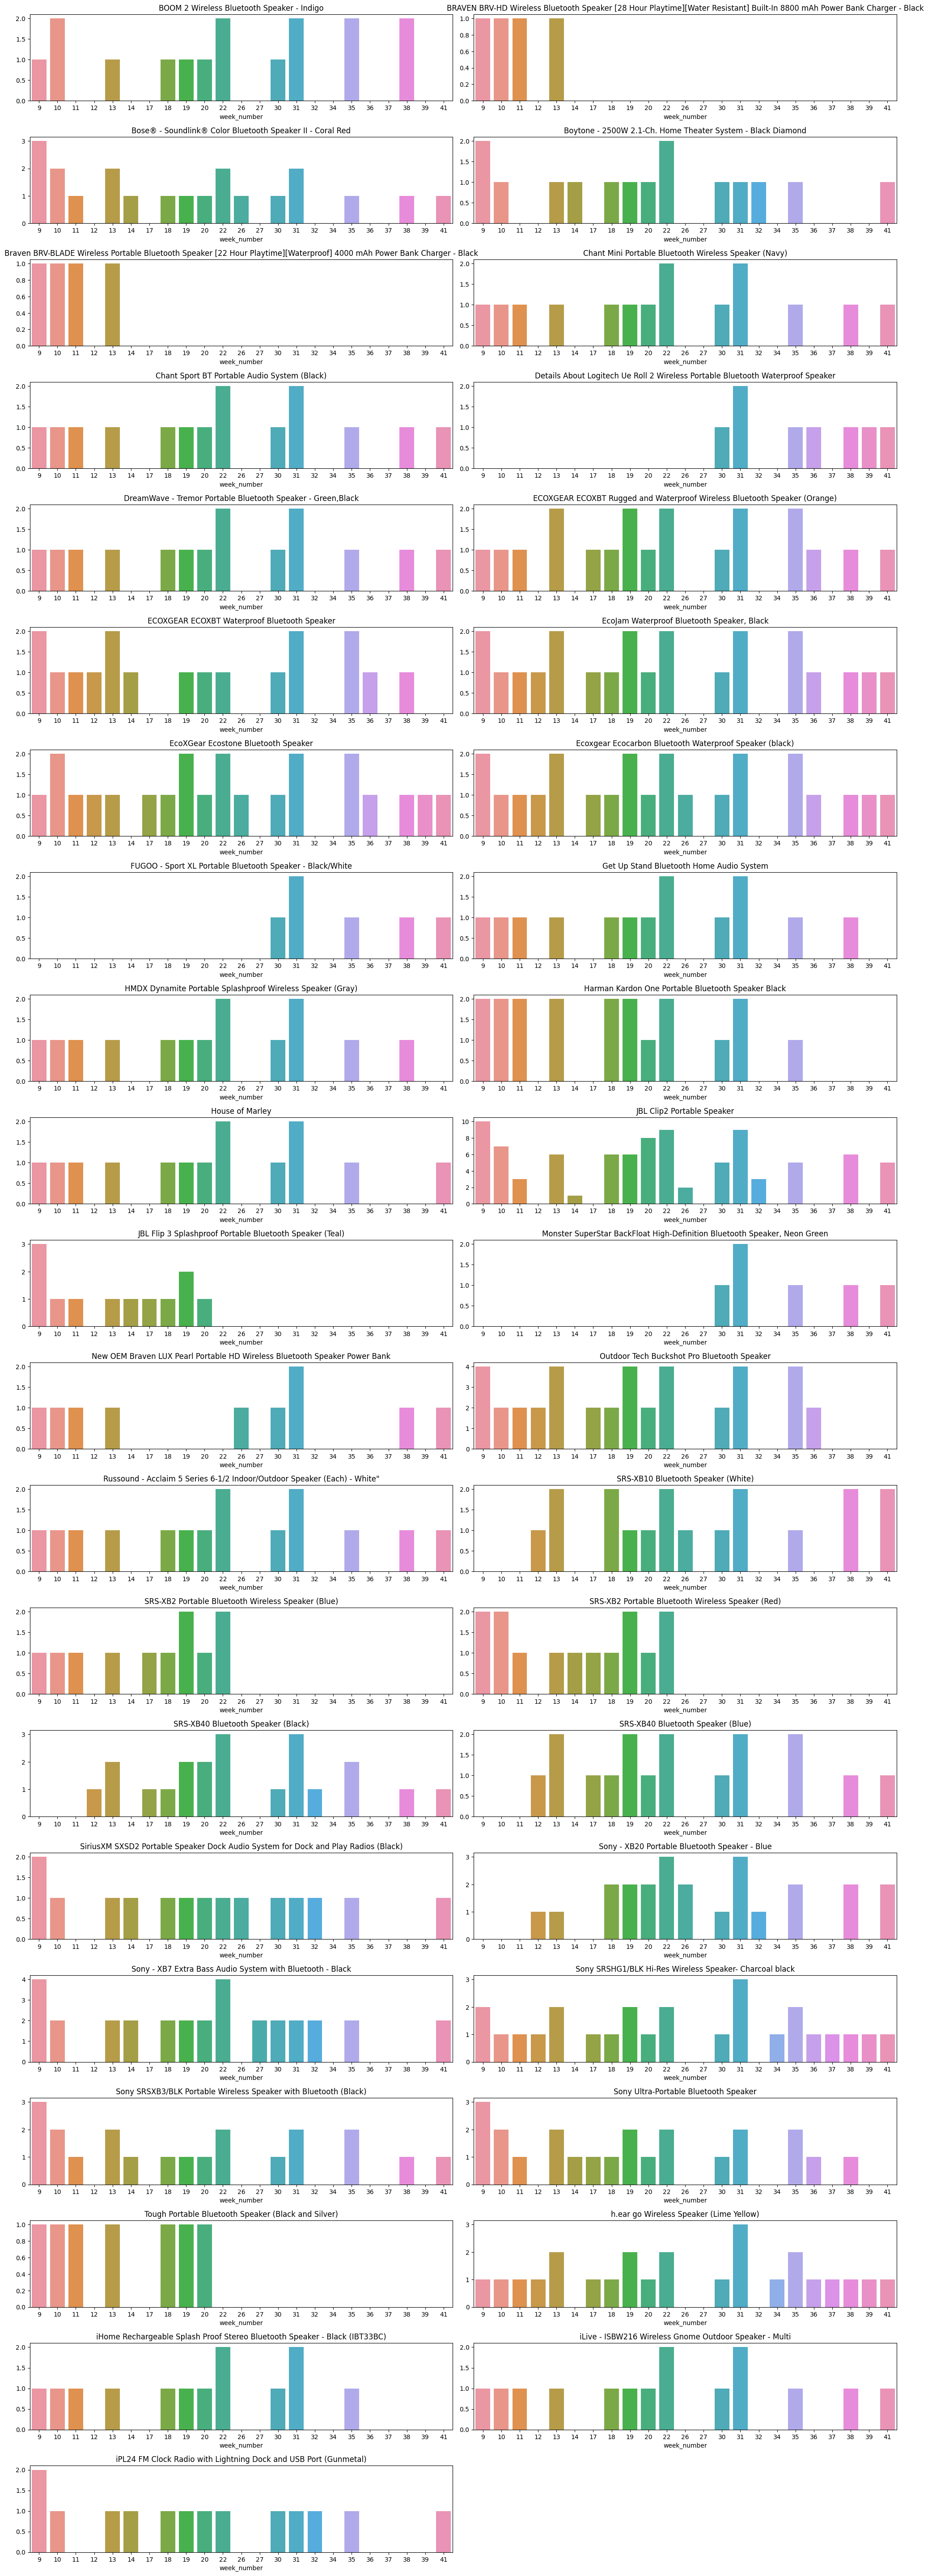

In [160]:
plt.figure(figsize=(20, 60))
for k in np.arange(1, len(y_demand.columns), 1):
    plt.subplot(22,2,k)
    sns.barplot(data=y_demand, x=y_demand['week_number'], y=y_demand[y_demand.columns[k]]);
    plt.title(y_demand.columns[k])
    plt.ylabel('')
    plt.tight_layout()

# 6.0 Machine Learning

In [161]:
#BestBuy.com -> categoria = speaker, portable, bluetooth

## 6.1 BOOM 2 Wireless Bluetooth Speaker - Indigo

In [162]:
import statsmodels.api as sm
x_item = x_price['BOOM 2 Wireless Bluetooth Speaker - Indigo']
y_item = y_demand['BOOM 2 Wireless Bluetooth Speaker - Indigo']
X_item = sm.add_constant(x_item)
model = sm.OLS(y_item, X_item)
results = model.fit()
print(results.summary())

                                        OLS Regression Results                                        
Dep. Variable:     BOOM 2 Wireless Bluetooth Speaker - Indigo   R-squared:                       0.196
Model:                                                    OLS   Adj. R-squared:                  0.157
Method:                                         Least Squares   F-statistic:                     5.106
Date:                                        Sun, 08 Oct 2023   Prob (F-statistic):             0.0346
Time:                                                18:08:11   Log-Likelihood:                -25.117
No. Observations:                                          23   AIC:                             54.23
Df Residuals:                                              21   BIC:                             56.50
Df Model:                                                   1                                         
Covariance Type:                                    nonrobust            

## 6.2 Todas as colunas

In [170]:
# dicionario para armazenar os resultados obtidos da regressão de cada produto
results_values = {
    "name": [],
    "price_elasticity": [],
    "price_mean": [],
    "quantity_mean": [],
    "quantity_total": [],
    "intercept": [],
    "slope": [],
    "rsquared": [],
    "p_value": []
}

# loop para cálculo de cada regressão
for column in x_price.columns[1:]:
    column_points = []
    for i in range(len(x_price[column])):
        column_points.append((x_price[column][i], y_demand[column][i]))
    df = pd.DataFrame(list(column_points), columns=['x_price', 'y_demand'])
    

    x = df['x_price']
    y = df['y_demand']
    X = sm.add_constant(x)
    #machine learning
    model = sm.OLS(y, X)
    results = model.fit()

    # caso o p-valor da regressão calculado para o produto seja menor que 0.05, o mesmo é considerado válido para estudo de elasticidade
    if results.f_pvalue < 0.05:
        
        rsquared = results.rsquared
        p_value = results.f_pvalue
        intercept, slope = results.params
        mean_price = np.mean(x)
        mean_quantity = np.mean(y)
        total_quantity = np.sum(y)


        price_elasticity = slope*(mean_price/mean_quantity)

        results_values['name'].append(column)
        results_values['price_elasticity'].append(price_elasticity)
        results_values['price_mean'].append(mean_price)
        results_values['quantity_mean'].append(mean_quantity)
        results_values['quantity_total'].append(total_quantity)
        results_values['intercept'].append(intercept)
        results_values['slope'].append(slope)
        results_values['rsquared'].append(rsquared)
        results_values['p_value'].append(p_value)

# transformando o dicionário em DataFrame
df_elasticity = pd.DataFrame.from_dict(results_values)

## 6.3 Produtos válidos para análise

In [171]:
df_elasticity

,name,price_elasticity,price_mean,quantity_mean,quantity_total,intercept,slope,rsquared,p_value
0,BOOM 2 Wireless Bluetooth Speaker - Indigo,-4.579784,189.555217,0.695652,16.0,3.881589,-0.016807,0.195595,0.034593
1,DreamWave - Tremor Portable Bluetooth Speaker ...,-61.188530,290.381304,0.652174,15.0,40.557737,-0.137425,0.236604,0.018595
2,FUGOO - Sport XL Portable Bluetooth Speaker - ...,-9.427256,291.642174,0.260870,6.0,2.720154,-0.008433,0.185972,0.039924
3,Get Up Stand Bluetooth Home Audio System,5.721514,238.859565,0.608696,14.0,-2.873965,0.014580,0.405843,0.001079
4,JBL Flip 3 Splashproof Portable Bluetooth Spea...,10.417129,82.596957,0.521739,12.0,-4.913285,0.065802,0.328917,0.004222
5,Monster SuperStar BackFloat High-Definition Bl...,9305.914683,119.953478,0.260870,6.0,-2427.369048,20.238095,0.185972,0.039924
6,SRS-XB2 Portable Bluetooth Wireless Speaker (B...,11.974735,83.033478,0.478261,11.0,-5.248786,0.068973,0.506519,0.000140
7,SRS-XB40 Bluetooth Speaker (Black),-6.954599,241.294348,0.913043,21.0,7.262895,-0.026316,0.262109,0.012512
8,SRS-XB40 Bluetooth Speaker (Blue),-7.027162,243.468261,0.739130,17.0,5.933120,-0.021333,0.205622,0.029768
9,SiriusXM SXSD2 Portable Speaker Dock Audio Sys...,-5.995652,115.055217,0.652174,15.0,4.562382,-0.033985,0.230630,0.020378


In [172]:
df_elasticity.to_csv('../data/processed/elasticity.csv', index=False)

# 7.0 Elasticidade

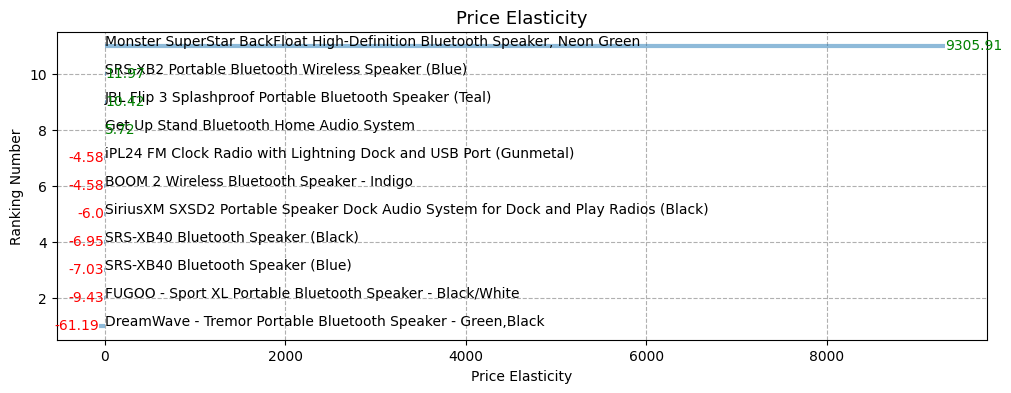

In [54]:
df_elasticity['ranking'] = df_elasticity.loc[ : ,'price_elasticity'].rank( ascending = True).astype(int)
df_elasticity = df_elasticity.reset_index(drop = True)
plt.figure(figsize = (12,4))
plt.hlines(y = df_elasticity['ranking'] , xmin = 0, xmax = df_elasticity['price_elasticity'], alpha = 0.5, linewidth = 3)

for name, p in zip(df_elasticity['name'], df_elasticity['ranking']):
    plt.text(4, p, name)

 #Add elasticity labels
for x, y, s in zip(df_elasticity['price_elasticity'], df_elasticity['ranking'], df_elasticity['price_elasticity']):
    plt.text(x, y, round(s, 2), horizontalalignment='right' if x < 0 else 'left', 
                                verticalalignment='center', 
                                fontdict={'color':'red' if x < 0 else 'green', 'size':10})
    
plt.gca().set(ylabel= 'Ranking Number', xlabel= 'Price Elasticity')
plt.title('Price Elasticity' , fontdict={'size':13})
plt.grid(linestyle='--')

In [55]:
df_order_elasticity = df_elasticity[['ranking', 'name', 'price_elasticity']].sort_values(by='price_elasticity', ascending=False)
df_order_elasticity

,ranking,name,price_elasticity
5,11,Monster SuperStar BackFloat High-Definition Bl...,9305.914683
6,10,SRS-XB2 Portable Bluetooth Wireless Speaker (B...,11.974735
4,9,JBL Flip 3 Splashproof Portable Bluetooth Spea...,10.417129
3,8,Get Up Stand Bluetooth Home Audio System,5.721514
10,7,iPL24 FM Clock Radio with Lightning Dock and U...,-4.579348
0,6,BOOM 2 Wireless Bluetooth Speaker - Indigo,-4.579784
9,5,SiriusXM SXSD2 Portable Speaker Dock Audio Sys...,-5.995652
7,4,SRS-XB40 Bluetooth Speaker (Black),-6.954599
8,3,SRS-XB40 Bluetooth Speaker (Blue),-7.027162
2,2,FUGOO - Sport XL Portable Bluetooth Speaker - ...,-9.427256


# 8.0 Business Performance

In [56]:
#dicionario para armazenar resultados
resultado_faturamento = {
        'name': [],
        'current_revenue': [],
        'worstcase_revenue':[],
        'risked_revenue':[],
        'expected_revenue':[],
        'variance':[],
        'variance_perc':[]
}


for i in range(len(df_order_elasticity)):
    preco_atual_medio = x_price[df_order_elasticity['name'][i]].mean()
    demanda_atual = y_demand[df_order_elasticity['name'][i]].sum()

    # preço promocional
    reducao_preco = preco_atual_medio*0.85

    # aumento da demanda considerando o valor de redução do preço (1.0 - 0.9)
    aumento_demanda = np.abs(0.15*df_order_elasticity['price_elasticity'][i])

    # cálculo da nova demanda considerando o aumento
    demanda_nova = demanda_atual-(aumento_demanda*demanda_atual)

    # faturamento atual
    faturamento_atual = round(preco_atual_medio*demanda_atual, 2)

    # faturamento com preço reduzido e nova demanda
    faturamento_novo = round(reducao_preco*demanda_nova, 2)

    # caso a demanda não altere, o quanto custa essa redução
    faturamento_reducao = round(faturamento_atual*0.9, 2)

    # risco de aplicar promoção e não houver aumento
    perda_faturamento = round(faturamento_atual-faturamento_reducao, 2)

    # variação entre faturamento atual e previsto
    variacao_faturamento = round(faturamento_novo-faturamento_atual ,2)

    # variação percentual
    variacao_percentual = round(((faturamento_novo-faturamento_atual)/faturamento_atual),2)

    # agrupando valores
    resultado_faturamento['name'].append(df_order_elasticity['name'][i])
    resultado_faturamento['current_revenue'].append(faturamento_atual)
    resultado_faturamento['worstcase_revenue'].append(faturamento_reducao)
    resultado_faturamento['risked_revenue'].append(perda_faturamento)
    resultado_faturamento['expected_revenue'].append(faturamento_novo)
    resultado_faturamento['variance'].append(variacao_faturamento)
    resultado_faturamento['variance_perc'].append(variacao_percentual)

resultado = pd.DataFrame(resultado_faturamento)
resultado

,name,current_revenue,worstcase_revenue,risked_revenue,expected_revenue,variance,variance_perc
0,BOOM 2 Wireless Bluetooth Speaker - Indigo,3032.88,2729.59,303.29,1770.97,-1261.91,-0.42
1,DreamWave - Tremor Portable Bluetooth Speaker ...,4355.72,3920.15,435.57,33981.31,29625.59,6.80
2,FUGOO - Sport XL Portable Bluetooth Speaker - ...,1749.85,1574.86,174.99,2103.28,353.43,0.20
3,Get Up Stand Bluetooth Home Audio System,3344.03,3009.63,334.40,2439.45,-904.58,-0.27
4,JBL Flip 3 Splashproof Portable Bluetooth Spea...,991.16,892.04,99.12,1316.45,325.29,0.33
5,Monster SuperStar BackFloat High-Definition Bl...,719.72,647.75,71.97,853951.78,853232.06,1185.51
6,SRS-XB2 Portable Bluetooth Wireless Speaker (B...,913.37,822.03,91.34,1394.51,481.14,0.53
7,SRS-XB40 Bluetooth Speaker (Black),5067.18,4560.46,506.72,4493.13,-574.05,-0.11
8,SRS-XB40 Bluetooth Speaker (Blue),4138.96,3725.06,413.90,3708.36,-430.60,-0.10
9,SiriusXM SXSD2 Portable Speaker Dock Audio Sys...,1725.83,1553.25,172.58,1319.30,-406.53,-0.24


In [57]:
preco_atual_medio = x_price['DreamWave - Tremor Portable Bluetooth Speaker - Green,Black'].mean()
demanda_atual = y_demand['DreamWave - Tremor Portable Bluetooth Speaker - Green,Black'].sum()

reducao_preco = preco_atual_medio*0.9
aumento_demanda = -0.1*df_order_elasticity['price_elasticity'][1]

demanda_nova = aumento_demanda*demanda_atual

faturamento_atual = preco_atual_medio*demanda_atual
faturamento_novo = reducao_preco*demanda_nova

faturamento_reducao = faturamento_atual*0.9

print(f'O faturamento atual é $ {round(faturamento_atual, 2)}, com a redução de 10% sugerida seria $ {round(faturamento_reducao, 2)}, portanto diminuíria R${round(faturamento_atual-faturamento_reducao, 2) }.')
print(f'Mas com o aumento da demanda devido a redução, o faturamento seria $ {round(faturamento_novo, 2)}, gerando um um incremento de R${round(faturamento_novo-faturamento_atual, 2)} ou {round(((faturamento_novo-faturamento_atual)/faturamento_atual)*100, 2)} % no faturamento')

O faturamento atual é $ 4355.72, com a redução de 10% sugerida seria $ 3920.15, portanto diminuíria R$435.57.
Mas com o aumento da demanda devido a redução, o faturamento seria $ 23986.81, gerando um um incremento de R$19631.09 ou 450.7 % no faturamento


In [60]:
# salvando arquivo csv
resultado.to_csv('../data/processed/business_performance.csv', index=False)

# 9.0 Cross Price Elasticity

In [61]:
def crossprice ( df_x, df_y, column_name):
    import statsmodels.api as sm
    # pegando todos os valores de x_price
    new_df = x_price.copy()
    # peganado os valores y_demand com o mesmo nome da coluna
    new_df['y_value-' + column_name] = y_demand[column_name]

    multi_xvalues =new_df.loc[:, new_df.columns[1:-1]]
    multi_yvalues = new_df.loc[:, new_df.columns[-1]]

    # obter o valor médio do preço do produto
    mean_xvalues = np.mean(multi_xvalues)
    # obter o valor médio da demanda do produto
    mean_yvalues = np.mean(multi_yvalues)


    # regressão linear
    X = sm.add_constant(multi_xvalues)
    model = sm.OLS(multi_yvalues, X, missing='drop')
    result = model.fit()

    #obtendo os resultados
    results_summary = result.summary()
    # p-valores para cada coeficiente
    pvalue = result.pvalues

    # transformando o resultado em uma dataframe
    results_as_html = results_summary.tables[1].as_html()
    new_dataframe = pd.read_html(results_as_html, header=0, index_col=0)[0]

    #adicionando o p-valor ao dataframe
    new_dataframe['p_value'] = pvalue

    #definindo o nome do produto como indice
    new_dataframe.index.name= 'name'
    new_dataframe.reset_index()

    #calculando a elasticidade cruzada
    new_dataframe['mean'] = mean_xvalues
    new_dataframe['price_elasticity'] = round((new_dataframe.coef)*(new_dataframe['mean']/mean_yvalues), 2)

    new_dataframe = new_dataframe.reset_index()
    pvalue_siginicant = new_dataframe['p_value']

    #verificando a hipótese nula(inclinação por produto)
    new_dataframe[column_name + 'CPE'] = np.where((pvalue_siginicant > 0.05), 'No Effect', new_dataframe['price_elasticity'])
    new_dataframe = new_dataframe.dropna()
    return new_dataframe[['name', column_name + 'CPE']]

In [62]:
result_df = pd.DataFrame()
for column in x_price.columns[1:]:
    result_df[['name', column +'CPE']] = crossprice(x_price, y_demand, column)

result_df = result_df.set_index('name')

/home/matheus/.pyenv/versions/3.10.7/envs/ge_ml/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/matheus/.pyenv/versions/3.10.7/envs/ge_ml/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/matheus/.pyenv/versions/3.10.7/envs/ge_ml/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just '

In [66]:
result_df.to_csv('../data/processed/crossprice.csv')